# Parkinson’s Disease Detection from Short Speech Recordings

## Author: Aynaz Javanivayeghan
## Student ID: 40301840

# Project Summary

## Abstract
This project explores the automatic detection of Parkinson's Disease (PD) from speech recordings using advanced deep learning techniques and feature extraction methods. Three different neural network architectures — X-vector, ECAPA-TDNN, and Whisper — were implemented, trained, and evaluated. Feature representations such as MFCCs and Fbanks were extracted to train the X-vector and ECAPA-TDNN models, while Whisper was used as a self-supervised feature extractor. Both original speech data and augmented versions (with noise and speed perturbations) were used to assess model robustness. Experimental results show that all models achieve very high accuracy on clean speech, with some expected degradation in performance under noisy or augmented conditions. The results demonstrate the potential for using speech-based machine learning systems as a non-invasive tool to assist in Parkinson's disease detection.

## Introduction
Parkinson's Disease (PD) is a progressive neurological disorder that affects motor functions, including speech articulation and fluency. Changes in speech patterns are among the early indicators of PD, making speech analysis a promising, non-invasive, and cost-effective method for early diagnosis and monitoring.

Recent advances in deep learning and speech processing have made it possible to extract detailed voice characteristics that go beyond simple acoustic features. Architectures like X-vector and ECAPA-TDNN, originally developed for speaker verification, have proven highly effective at capturing speaker-specific traits. These traits include fine motor control signals embedded in speech that can reveal the subtle impairments caused by PD.

In this project, we leverage these speaker embeddings and combine them with supervised classification to distinguish between speech samples from individuals with Parkinson’s disease and healthy controls. Additionally, we investigate the effect of data augmentation on model robustness, an important step towards real-world deployment.

## Methodology

- **Feature Extraction**:
  - **MFCCs (Mel-Frequency Cepstral Coefficients)** were used for the X-vector model.
  - **Fbanks (Filterbanks)** were used for the ECAPA-TDNN model.
  - **SSL Features** were extracted using **Whisper** model.

- **Model Architectures**:
  - **X-vector**: Produces a fixed-size speaker embedding from variable-length audio using TDNN layers.
  - **ECAPA-TDNN**: A powerful embedding model that uses SE-Res2Net and attention mechanisms.
  - **Whisper**: Self-supervised pre-trained models adapted to extract rich speech representations.

- **Augmentation Strategy**:
  - Applied Gaussian noise and speed perturbation to simulate real-world recording variability.

- **Training Details**:
  - Classification heads trained using Negative Log-Likelihood (NLL) loss.
  - Global mean-variance normalization on features.
  - Learning rate scheduling applied with linear decay or NewBobScheduler.

## Experimental Setup

- **Dataset**:
  - Short speech recordings labeled as "Parkinson" or "Healthy".
  - Train/Validation/Test splits defined in JSON files.
  - Data augmentation applied to training set for robustness evaluation.

- **Training Parameters**:
  - Sample rate: 16 kHz
  - Epochs: 20
  - Batch size: 2 or 4 or 8 (depending on model)
  - Optimizer: Adam
  - Learning rate schedules applied.

- **Models Trained**:
  - Xvector with MFCCs (original and augmented)
  - ECAPA-TDNN with Fbanks (original and augmented)
  - Whisper Base and Tiny (original and augmented)
  

## Experimental Results

| Model                         | Dataset             | Final Valid Error (%) | Final Test Accuracy (%) | Final Test Error (%) | Test Loss   |
|:------------------------------|:--------------------|:---------------------:|:-----------------------:|:--------------------:|:-----------:|
| Xvector (MFCC)                | Original            | 1.22%                 | 100%                    | 0%                   | 0.00857     |
| Xvector (MFCC)                | Augmented           | 18.3%                 | 90.6%                   | 9.41%                | 0.315       |
| ECAPA-TDNN (Fbank, small)      | Original            | 0%                    | 100%                    | 0%                   | 0.131       |
| ECAPA-TDNN (Fbank, small)      | Augmented (Batch)   | 19.5%                 | 85.9%                   | 14.1%                | 0.362       |
| Whisper                       | Original            | 3.7%                  | 95.3%                   | 4.7%                 | -           |
| Whisper                       | Augmented           | 29.4%                 | 70.6%                   | 29.4%                | -           |

**Notes**:
- Models perform extremely well (near 100%) on original clean data.
- Augmented data introduces realistic noise, reducing model performance, revealing robustness limitations.
- ECAPA-TDNN and Xvector are relatively more stable under augmentation compared to Whisper.

## Conclusions

- **Embedding-based methods (Xvector, ECAPA-TDNN)** are highly effective for Parkinson’s detection from speech, achieving excellent accuracy on clean data.
- **Pre-trained SSL models (Whisper)** provide strong baselines but are more sensitive to augmented noise compared to speaker embedding models.
- **Data Augmentation** is crucial for building robust models that generalize better to real-world conditions.
- Future work could include:
  - Fine-tuning pre-trained SSL models more deeply.
  - Combining MFCC/Fbank features with SSL features.
  - Exploring additional augmentations such as reverberation or background babble.

## References

- Snyder, D., Garcia-Romero, D., Sell, G., Povey, D., & Khudanpur, S. (2018). **X-vectors: Robust DNN embeddings for speaker recognition**. *In 2018 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP)* (pp. 5329-5333). IEEE. [https://doi.org/10.1109/ICASSP.2018.8461375](https://doi.org/10.1109/ICASSP.2018.8461375)

- Desplanques, B., Thienpondt, J., & Demuynck, K. (2020). **ECAPA-TDNN: Emphasized Channel Attention, Propagation and Aggregation in TDNN Based Speaker Verification**. *In Proceedings of Interspeech 2020* (pp. 3830–3834). [https://doi.org/10.21437/Interspeech.2020-2650](https://doi.org/10.21437/Interspeech.2020-2650)

- Radford, A., Kim, J. W., Hallacy, C., Ramesh, A., Goh, G., Agarwal, S., ... & Sutskever, I. (2023). **Robust Speech Recognition via Large-Scale Weak Supervision** (Whisper). *arXiv preprint arXiv:2212.04356*. [https://arxiv.org/abs/2212.04356](https://arxiv.org/abs/2212.04356)

- SpeechBrain Team. (2021). **SpeechBrain: A General-Purpose Speech Toolkit**. *arXiv preprint arXiv:2106.04624*. [https://arxiv.org/abs/2106.04624](https://arxiv.org/abs/2106.04624)

- Orozco-Arroyave, J. R., Hönig, F., Arias-Londoño, J. D., Vargas-Bonilla, J. F., Skodda, S., Rusz, J., & Nöth, E. (2016). **Automatic detection of Parkinson's disease in running speech spoken in three different languages**. *The Journal of the Acoustical Society of America*, 139(1), 481–500. [https://doi.org/10.1121/1.4939643](https://doi.org/10.1121/1.4939643)

- Little, M. A., McSharry, P. E., Hunter, E. J., Spielman, J., & Ramig, L. O. (2009). **Suitability of dysphonia measurements for telemonitoring of Parkinson’s disease**. *IEEE Transactions on Biomedical Engineering*, 56(4), 1015–1022. [https://doi.org/10.1109/TBME.2008.2005954](https://doi.org/10.1109/TBME.2008.2005954)

---

# Environment Setup

Set up the environment by installing **SpeechBrain** and required libraries.

- Installs the `develop` branch of SpeechBrain from GitHub.
- Clones the SpeechBrain repository locally.
- Installs the Hugging Face `datasets` library.

In [ ]:
%%capture
# Installing SpeechBrain via pip
BRANCH = 'develop'
!python -m pip install git+https://github.com/speechbrain/speechbrain.git@$BRANCH

# Clone SpeechBrain repository
!git clone https://github.com/speechbrain/speechbrain/

!pip install datasets

## Import the necessary libraries

In [ ]:
import torchaudio
import speechbrain as sb
from speechbrain.utils.data_utils import get_all_files
import json
import torchaudio
from datasets import load_dataset
import random
import re
import matplotlib.pyplot as plt

DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _speechbrain_save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _speechbrain_load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _recover


# Loading the Dataset, Creating JSON

Prepare the Italian Parkinson's Voice and Speech dataset for use in audio analysis.

-   Downloads the "Italian_Parkinsons_Voice_and_Speech" dataset from Hugging Face.
-   Calculates the duration of each audio sample using `torchaudio`.
-   Assigns a binary label to each sample: '0' for samples up to index 393, and '1' for subsequent samples.
-   Creates a JSON file (dataset.json) where each entry contains the audio file path, duration, and label for each sample.

In [19]:
import os
import json
import torchaudio
from datasets import load_dataset

ds = load_dataset("birgermoell/Italian_Parkinsons_Voice_and_Speech")
train_data = ds["train"]

def create_dataset_json(dataset, filename):
    json_dict = {}
    for idx, sample in enumerate(dataset):
        if idx >= 831:
            break
        try:
            audiofile = sample["audio"]["path"]
            info = torchaudio.info(audiofile)
            duration = info.num_frames / info.sample_rate
            label = "0" if idx <= 393 else "1"
            uttid = f"sample_{idx}"
            json_dict[uttid] = {
                "wav_path": audiofile,
                "length": duration,
                "label": label
            }
        except Exception as e:
            print(f"Skipped {idx}: {e}")

    with open(filename, "w") as f:
        json.dump(json_dict, f, indent=2)

create_dataset_json(train_data, "dataset.json")
print("dataset.json has been created successfully!")

Resolving data files:   0%|          | 0/833 [00:00<?, ?it/s]

dataset.json has been created successfully!


# Generate Train, Test, and Valid Sets

Split the prepared dataset into train, valid, and test sets.

1.  **Load Data:** Loads the data from `dataset.json` created in the previous step.
2.  **Data Structuring:** Converts the loaded data into a list of dictionaries, where each dictionary represents a sample with `uttid`, `wav_path`, `length`, and `label` keys.
3.  **Stratified Splitting:** Applies a stratified split to each label group using the `stratified_split` function, dividing the data into training (80%), validation (10%), and test (10%) sets.
4.  **Shuffle:** Randomly shuffles the samples.
5.  **Save Splits:** Saves the train, valid, and test sets into separate JSON files (`train.json`, `valid.json`, and `test.json`) with the same structure.


In [ ]:
import json
import random

with open("dataset.json", "r") as f:
    data = json.load(f)

samples = [
    {
        "uttid": uttid,
        "wav_path": info["wav_path"],
        "length": info["length"],
        "label": int(info["label"])
    }
    for uttid, info in data.items()
]

label_0 = [s for s in samples if s["label"] == 0]
label_1 = [s for s in samples if s["label"] == 1]

random.seed(42)
random.shuffle(label_0)
random.shuffle(label_1)

def stratified_split(class_samples, train_ratio=0.8, val_ratio=0.1):
    total = len(class_samples)
    train_end = int(total * train_ratio)
    val_end = train_end + int(total * val_ratio)
    return class_samples[:train_end], class_samples[train_end:val_end], class_samples[val_end:]

train_0, val_0, test_0 = stratified_split(label_0)
train_1, val_1, test_1 = stratified_split(label_1)

train = train_0 + train_1
val = val_0 + val_1
test = test_0 + test_1

random.shuffle(train)
random.shuffle(val)
random.shuffle(test)

def save_json(filename, samples):
    output_dict = {
        s["uttid"]: {
            "wav_path": s["wav_path"],
            "length": s["length"],
            "label": s["label"]
        }
        for s in samples
    }
    with open(filename, "w") as f:
        json.dump(output_dict, f, indent=2)

save_json("train.json", train)
save_json("valid.json", val)
save_json("test.json", test)

print(f"Train Samples: {len(train)}\nValid Samples: {len(val)}\nTest Samples: {len(test)}")

# Dataset Augmentation

### This cell creates a new augmented dataset by applying:

1. **Gaussian Noise**: Adds random noise to each original audio sample.

2. **Speed Perturbation**: Speeds up the audio using Sox effects.

Each modified audio file is saved into the `noisy_audio/` directory.

A new JSON file called `noisy_dataset.json` will be saved. It contains:
  - The path to each modified file
  - The audio duration
  - The speaker label (0 and 1)

In [ ]:
!apt-get install sox libsox-dev libsox-fmt-all
!rm -rf ./augmented_audio/

In [ ]:
import os
import json
import numpy as np
import torchaudio
import soundfile as sf
import torch
import random
from torchaudio import sox_effects

with open("dataset.json", "r") as f:
    original_data = json.load(f)

output_dir = "augmented_audio"
os.makedirs(output_dir, exist_ok=True)

noise_factor = 0.15
target_duration_sec = 5.0
zero_chunk_prob = 0.3
reverb_prob = 0.5

augmented_dataset = {}
error_count = 0

for uttid, entry in original_data.items():
    try:
        audiofile = entry["wav_path"]
        audio, sr = sf.read(audiofile)

        if len(audio.shape) > 1:
            audio = np.mean(audio, axis=1)

        target_len = int(sr * target_duration_sec)
        if len(audio) > target_len:
            audio = audio[:target_len]

        noise = noise_factor * np.random.randn(*audio.shape)
        noisy_audio = np.clip(audio + noise, -1.0, 1.0)

        temp_path = "temp_noisy.wav"
        sf.write(temp_path, noisy_audio, sr)

        effects = [["speed", "1.4"], ["rate", str(sr)]]
        if random.random() < reverb_prob:
            effects.append(["reverb", "-w"])
        sped_up, new_sr = sox_effects.apply_effects_file(temp_path, effects)

        if not isinstance(sped_up, torch.Tensor):
            sped_up = torch.tensor(sped_up)
        if sped_up.dim() == 1:
            sped_up = sped_up.unsqueeze(0)
        elif sped_up.shape[0] > 1:
            sped_up = torch.mean(sped_up, dim=0, keepdim=True)

        if random.random() < zero_chunk_prob:
            chunk_len = int(new_sr * 0.5)
            if sped_up.shape[1] > chunk_len:
                start = random.randint(0, sped_up.shape[1] - chunk_len)
                sped_up[:, start:start+chunk_len] = 0

        base_name = os.path.basename(audiofile).replace(".wav", "_augmented.wav")
        out_path = os.path.join(output_dir, base_name)
        torchaudio.save(out_path, sped_up, new_sr)

        augmented_dataset[uttid] = {
            "wav_path": out_path,
            "length": sped_up.shape[1] / new_sr,
            "label": int(entry["label"]),
        }

    except Exception as e:
        error_count += 1
        print(f"Skipped {uttid}: {e}")

with open("new_dataset.json", "w") as f:
    json.dump(augmented_dataset, f, indent=2)

print(f"\nFinal augmented dataset saved to 'new_dataset.json'")
print(f"Total samples: {len(augmented_dataset)} (Errors skipped: {error_count})")


✅ Final augmented dataset saved to 'new_dataset.json'
📊 Total samples: 831 (Errors skipped: 0)


##Creating json files

In [ ]:
import json
import random

with open("new_dataset.json", "r") as f:
    data = json.load(f)

samples = [
    {
        "uttid": uttid,
        "wav_path": info["wav_path"],
        "length": info["length"],
        "label": int(info["label"])
    }
    for uttid, info in data.items()
]

label_0 = [s for s in samples if s["label"] == 0]
label_1 = [s for s in samples if s["label"] == 1]

random.seed(42)
random.shuffle(label_0)
random.shuffle(label_1)

def stratified_split(class_samples, train_ratio=0.8, val_ratio=0.1):
    total = len(class_samples)
    train_end = int(total * train_ratio)
    val_end = train_end + int(total * val_ratio)
    return class_samples[:train_end], class_samples[train_end:val_end], class_samples[val_end:]

train_0, val_0, test_0 = stratified_split(label_0)
train_1, val_1, test_1 = stratified_split(label_1)

train = train_0 + train_1
val = val_0 + val_1
test = test_0 + test_1

random.shuffle(train)
random.shuffle(val)
random.shuffle(test)

def save_json(filename, samples):
    output_dict = {
        s["uttid"]: {
            "wav_path": s["wav_path"],
            "length": s["length"],
            "label": s["label"]
        }
        for s in samples
    }
    with open(filename, "w") as f:
        json.dump(output_dict, f, indent=2)

save_json("new_train.json", train)
save_json("new_valid.json", val)
save_json("new_test.json", test)

print(f"Train Samples: {len(train)}\nValid Samples: {len(val)}\nTest Samples: {len(test)}")

Train Samples: 664
Valid Samples: 82
Test Samples: 85


# Model 1: XVector + MFCC (original data)

## Why XVector?

* **Speaker Embeddings:** X-vectors are designed to create a fixed-length, low-dimensional representation (embedding) of a speaker's voice characteristics. This is crucial because the input audio can vary in length, but the classifier needs a consistent input size.
* **Effective for Speaker Discrimination:** X-vectors are known to be very effective at capturing speaker-specific information, allowing the model to differentiate between different speakers. In this case, the model needs to differentiate between speech samples from individuals with Parkinson's and those without.
* **Established Technique:** X-vectors are a well-established and widely used technique in speaker recognition, with a strong track record of performance.

# Hyperparameter (YAML)

This YAML file (`hparams_xvector_mfccs.yaml`) defines the hyperparameters for training an X-vector model with MFCC features using the SpeechBrain toolkit.  

**Key sections**:

-   **`train_annotation`, `valid_annotation`, `test_annotation`**:  Define the JSON files containing the train, valid, and test data annotations.
-   **`sample_rate`**:  Defines the audio sample rate (16000 Hz).
-   **`n_classes`**: Specifies the number of classes (2 in this case).
-   **`n_mfcc`**:  Sets the number of MFCC coefficients to use (20).
-   **`emb_dim`**:  Sets the dimensionality of the X-vector embeddings (512).
-   **`compute_features`**:  Defines the MFCC feature extraction module using SpeechBrain's `MFCC` class.
-   **`mean_var_norm`**:  Specifies the input normalization method (global mean and variance normalization).
-   **`embedding_model`**:  Configures the X-vector model architecture using SpeechBrain's `Xvector` class, including the number of TDNN blocks, channels, kernel sizes, dilations, and linear neurons.
-   **`classifier`**: Defines the classifier model applied on top of the X-vector embeddings.

In [ ]:
%%file hparams_xvector_mfccs.yaml

seed: 1986
__set_seed: !!python/object/apply:torch.manual_seed [!ref <seed>]

output_folder: !ref ./results/Parkinsons/Xvector/MFCCs/<seed>

save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

train_annotation: train.json
valid_annotation: valid.json
test_annotation: test.json

train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

error_stats: !name:speechbrain.utils.metric_stats.MetricStats
    metric: !name:speechbrain.nnet.losses.classification_error
        reduction: batch

# Training Parameters
sample_rate: 16000
number_of_epochs: 20
n_classes: 2
batch_size: 4
lr_start: 0.001
lr_final: 0.0001
n_mfcc: 20
win_length: 25
hop_length: 10
n_fft: 400

emb_dim: 512
dataloader_options:
    batch_size: !ref <batch_size>

compute_features: !new:speechbrain.lobes.features.MFCC
    deltas: False
    context: False
    f_min: 0
    f_max: 8000
    n_fft: !ref <n_fft>
    n_mfcc: !ref <n_mfcc>

    win_length: !ref <win_length>
    hop_length: !ref <hop_length>

mean_var_norm: !new:speechbrain.processing.features.InputNormalization
    norm_type: global

embedding_model: !new:speechbrain.lobes.models.Xvector.Xvector
    in_channels: !ref <n_mfcc>
    activation: !name:torch.nn.LeakyReLU
    tdnn_blocks: 5
    tdnn_channels: [64, 64, 64, 64, 128]

    tdnn_kernel_sizes: [5, 3, 3, 1, 1]
    tdnn_dilations: [1, 2, 3, 1, 1]
    lin_neurons: !ref <emb_dim>

classifier: !new:speechbrain.lobes.models.Xvector.Classifier
    input_shape: [null, null, !ref <emb_dim>]
    activation: !name:torch.nn.LeakyReLU
    lin_blocks: 1
    lin_neurons: !ref <emb_dim>
    out_neurons: 2

epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

modules:
    compute_features: !ref <compute_features>
    mean_var_norm: !ref <mean_var_norm>
    embedding_model: !ref <embedding_model>
    classifier: !ref <classifier>

opt_class: !name:torch.optim.Adam
    lr: !ref <lr_start>

lr_annealing: !new:speechbrain.nnet.schedulers.LinearScheduler
    initial_value: !ref <lr_start>
    final_value: !ref <lr_final>
    epoch_count: !ref <number_of_epochs>

checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        embedding_model: !ref <embedding_model>
        classifier: !ref <classifier>
        normalizer: !ref <mean_var_norm>
        counter: !ref <epoch_counter>

Writing hparams_xvector_mfccs.yaml


# Train.py

This Python script (`train_xvector.py`) uses the SpeechBrain library to train an X-vector model for speaker recognition. Key aspects:

* **SpeakerBrain Class**: Defines the training logic, including:

    * `compute_forward()`: Computes output probabilities from input audio.

    * `compute_objectives()`: Calculates the loss function.

    * `on_stage_start()`/`on_stage_end()`: Handle setup and cleanup at the beginning/end of each training stage (train, validation, test).

* **`dataio_prep()`**:  Prepares the audio data and labels, creating SpeechBrain datasets.


In [ ]:
%%file train_xvector.py

"Recipe for training a digit classification system."
import os
import sys
import torch
import torchaudio
import speechbrain as sb
from hyperpyyaml import load_hyperpyyaml
import numpy as np
import matplotlib.pyplot as plt

class SpeakerBrain(sb.Brain):
    """Class that manages the training loop. See speechbrain.core.Brain."""

    def compute_forward(self, batch, stage):
        """Runs all the computations that transform the input into the
        output probabilities over the N classes.

        Arguments
        ---------
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        Returns
        -------
        predictions : Tensor
            Tensor that contains the posterior probabilities over the N classes.
        """
        batch = batch.to(self.device)

        signals, lens = batch.sig
        feats = self.hparams.compute_features(signals)
        feats = self.hparams.mean_var_norm(feats, lens)
        embeddings = self.modules.embedding_model(feats, lens)
        predictions = self.modules.classifier(embeddings)

        return predictions

    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss given the predicted and targeted outputs.

        Arguments
        ---------
        predictions : tensor
            The output tensor from `compute_forward`.
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        Returns
        -------
        loss : torch.Tensor
            A one-element tensor used for backpropagating the gradient.
        """
        _, lens = batch.sig
        labelid, _ = batch.label_encoded

        # label_encoded -> labelid

        if stage == sb.Stage.TRAIN and hasattr(self.modules, "env_corrupt"):
            labelid = torch.cat([labelid, labelid], dim=0)
            lens = torch.cat([lens, lens])

        loss = sb.nnet.losses.nll_loss(predictions, labelid, lens)

        self.loss_metric.append(batch.id, predictions, labelid, lens, reduction="batch")

        if stage != sb.Stage.TRAIN:
            self.error_metrics.append(batch.id, predictions, labelid, lens)

        return loss

    def on_stage_start(self, stage, epoch=None):
        """Gets called at the beginning of each epoch.
        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """
        self.loss_metric = sb.utils.metric_stats.MetricStats(
            metric=sb.nnet.losses.nll_loss
        )

        if stage != sb.Stage.TRAIN:
            self.error_metrics = self.hparams.error_stats()

    def on_stage_end(self, stage, stage_loss, epoch=None):
        """Gets called at the end of an epoch.
        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, sb.Stage.TEST
        stage_loss : float
            The average loss for all of the data processed in this stage.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """
        if stage == sb.Stage.TRAIN:
            self.train_loss = stage_loss
        else:
            stats = {
                "loss": stage_loss,
                "error": self.error_metrics.summarize("average"),
            }

        if stage == sb.Stage.VALID:
            old_lr, new_lr = self.hparams.lr_annealing(epoch)
            sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)

            self.hparams.train_logger.log_stats(
                {"Epoch": epoch, "lr": old_lr},
                train_stats={"loss": self.train_loss},
                valid_stats=stats,
            )
            self.checkpointer.save_and_keep_only(meta=stats, min_keys=["error"])

        if stage == sb.Stage.TEST:
            self.hparams.train_logger.log_stats(
                {"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stats,
            )

def dataio_prep(hparams):

    label_encoder = sb.dataio.encoder.CategoricalEncoder()

    @sb.utils.data_pipeline.takes("wav_path")
    @sb.utils.data_pipeline.provides("sig")
    def audio_pipeline(wav):
        """Load the signal, and pass it and its length to the corruption class.
        This is done on the CPU in the `collate_fn`."""
        sig = sb.dataio.dataio.read_audio(wav)
        sig = sig.squeeze(0)
        return sig

    @sb.utils.data_pipeline.takes("label")
    @sb.utils.data_pipeline.provides("label", "label_encoded")
    def label_pipeline(label):
        yield label
        label_encoded = label_encoder.encode_label_torch(label)
        yield label_encoded

    datasets = {}
    data_info = {
        "train": hparams["train_annotation"],
        "valid": hparams["valid_annotation"],
        "test": hparams["test_annotation"],
    }
    hparams["dataloader_options"]["shuffle"] = True
    for dataset in data_info:
        datasets[dataset] = sb.dataio.dataset.DynamicItemDataset.from_json(
            json_path=data_info[dataset],
            dynamic_items=[audio_pipeline, label_pipeline],
            output_keys=["id", "sig", "label_encoded"]
        )

    lab_enc_file = os.path.join(hparams["save_folder"], "label_encoder.txt")
    label_encoder.load_or_create(
        path=lab_enc_file,
        from_didatasets=[datasets["train"]],
        output_key="label",
    )

    return datasets

if __name__ == "__main__":
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin, overrides)
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )
    datasets = dataio_prep(hparams)
    speaker_brain = SpeakerBrain(
        modules=hparams["modules"],
        opt_class=hparams["opt_class"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )
    speaker_brain.fit(
        epoch_counter=speaker_brain.hparams.epoch_counter,
        train_set=datasets["train"],
        valid_set=datasets["valid"],
        train_loader_kwargs=hparams["dataloader_options"],
        valid_loader_kwargs=hparams["dataloader_options"],
    )
    test_stats = speaker_brain.evaluate(
        test_set=datasets["test"],
        min_key="error",
        test_loader_kwargs=hparams["dataloader_options"],
    )

Overwriting train_xvector.py


In [ ]:
!rm -rf ./results

In [ ]:
!python train_xvector.py hparams_xvector_mfccs.yaml --device='cuda'

/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
speechbrain.utils.quirks - Applied quirks (see `speechbrain.utils.quirks`): [disable_jit_profiling, allow_tf32]
speechbrain.utils.quirks - Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: ./results/Parkinsons/Xvector/MFCCs/1986
speechbrain.dataio.encoder - Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - Gradscaler enabled: `False`
speechbrain.core - Using training precision: `--precision=fp32`
speechbrain.core - Using evaluation precision: `--eval_precision=fp32`
sp

# Hyperparameter Tuning

# Results 1

### With Xvector, Batch 4, Starting channel 64

Epoch: 1, lr: 1.00e-03 - train loss: 6.78e-01 - valid loss: 2.19e-01, valid error: 7.23e-02

Epoch: 2, lr: 9.53e-04 - train loss: 5.80e-01 - valid loss: 3.65e-01, valid error: 1.81e-01

Epoch: 3, lr: 9.05e-04 - train loss: 5.31e-01 - valid loss: 7.05e-01, valid error: 3.49e-01

Epoch: 4, lr: 8.58e-04 - train loss: 5.10e-01 - valid loss: 3.21e-01, valid error: 9.64e-02

Epoch: 5, lr: 8.11e-04 - train loss: 4.32e-01 - valid loss: 2.82e-01, valid error: 7.23e-02

Epoch: 6, lr: 7.63e-04 - train loss: 4.01e-01 - valid loss: 1.36e-01, valid error: 2.41e-02

Epoch: 7, lr: 7.16e-04 - train loss: 3.65e-01 - valid loss: 1.04e-01, valid error: 0.00e+00

Epoch: 8, lr: 6.68e-04 - train loss: 4.30e-01 - valid loss: 1.97e-01, valid error: 6.02e-02

Epoch: 9, lr: 6.21e-04 - train loss: 3.42e-01 - valid loss: 1.10e-01, valid error: 2.41e-02

Epoch: 10, lr: 5.74e-04 - train loss: 3.86e-01 - valid loss: 2.08e-01, valid error: 3.61e-02

Epoch: 11, lr: 5.26e-04 - train loss: 2.89e-01 - valid loss: 8.19e-02, valid error: 2.41e-02

Epoch: 12, lr: 4.79e-04 - train loss: 2.63e-01 - valid loss: 8.50e-02, valid error: 3.61e-02

Epoch: 13, lr: 4.32e-04 - train loss: 2.83e-01 - valid loss: 7.08e-02, valid error: 0.00e+00

Epoch: 14, lr: 3.84e-04 - train loss: 2.85e-01 - valid loss: 4.34e-02, valid error: 0.00e+00

Epoch: 15, lr: 3.37e-04 - train loss: 3.16e-01 - valid loss: 6.28e-02, valid error: 0.00e+00

Epoch: 16, lr: 2.89e-04 - train loss: 2.60e-01 - valid loss: 5.48e-02, valid error: 1.20e-02

Epoch: 17, lr: 2.42e-04 - train loss: 2.26e-01 - valid loss: 6.95e-02, valid error: 1.20e-02

Epoch: 18, lr: 1.95e-04 - train loss: 1.91e-01 - valid loss: 4.80e-02, valid error: 0.00e+00

Epoch: 19, lr: 1.47e-04 - train loss: 2.00e-01 - valid loss: 4.66e-02, valid error: 0.00e+00

Epoch: 20, lr: 1.00e-04 - train loss: 2.56e-01 - valid loss: 4.59e-02, valid error: 0.00e+00

Epoch loaded: 20 - test loss: 9.20e-02, test error: 1.19e-02

# Results 2

### With Xvector, Batch 8, Starting channel 64

Epoch: 1, lr: 1.00e-03 - train loss: 5.21e-01 - valid loss: 2.12e-01, valid error: 7.23e-02

Epoch: 2, lr: 9.53e-04 - train loss: 3.56e-01 - valid loss: 5.18e-01, valid error: 1.45e-01

Epoch: 3, lr: 9.05e-04 - train loss: 3.37e-01 - valid loss: 7.36e-01, valid error: 2.41e-01

Epoch: 4, lr: 8.58e-04 - train loss: 2.55e-01 - valid loss: 2.87e-01, valid error: 1.57e-01

Epoch: 5, lr: 8.11e-04 - train loss: 2.55e-01 - valid loss: 9.25e-02, valid error: 3.61e-02

Epoch: 6, lr: 7.63e-04 - train loss: 1.74e-01 - valid loss: 5.42e-02, valid error: 2.41e-02

Epoch: 7, lr: 7.16e-04 - train loss: 1.99e-01 - valid loss: 7.43e-02, valid error: 1.20e-02

Epoch: 8, lr: 6.68e-04 - train loss: 1.97e-01 - valid loss: 3.57e-02, valid error: 0.00e+00

Epoch: 9, lr: 6.21e-04 - train loss: 1.53e-01 - valid loss: 7.52e-02, valid error: 2.41e-02

Epoch: 10, lr: 5.74e-04 - train loss: 1.96e-01 - valid loss: 2.80e-02, valid error: 2.41e-02

Epoch: 11, lr: 5.26e-04 - train loss: 1.52e-01 - valid loss: 5.93e-02, valid error: 2.41e-02

Epoch: 12, lr: 4.79e-04 - train loss: 1.21e-01 - valid loss: 2.30e-02, valid error: 1.20e-02

Epoch: 13, lr: 4.32e-04 - train loss: 1.46e-01 - valid loss: 2.68e-02, valid error: 0.00e+00

Epoch: 14, lr: 3.84e-04 - train loss: 1.06e-01 - valid loss: 1.14e-02, valid error: 0.00e+00

Epoch: 15, lr: 3.37e-04 - train loss: 1.41e-01 - valid loss: 1.87e-02, valid error: 1.20e-02

Epoch: 16, lr: 2.89e-04 - train loss: 9.91e-02 - valid loss: 9.50e-03, valid error: 0.00e+00

Epoch: 17, lr: 2.42e-04 - train loss: 5.88e-02 - valid loss: 8.44e-03, valid error: 0.00e+00

Epoch: 18, lr: 1.95e-04 - train loss: 5.13e-02 - valid loss: 9.36e-03, valid error: 0.00e+00

Epoch: 19, lr: 1.47e-04 - train loss: 4.69e-02 - valid loss: 3.76e-02, valid error: 1.20e-02

Epoch: 20, lr: 1.00e-04 - train loss: 9.03e-02 - valid loss: 1.28e-02, valid error: 1.20e-02

Epoch loaded: 18 - test loss: 2.32e-02, test error: 1.19e-02


# Results 3

### With Xvector, Batch 16, Starting channel 64

Epoch: 1, lr: 1.00e-03 - train loss: 4.60e-01 - valid loss: 2.89e-01, valid error: 1.45e-01

Epoch: 2, lr: 9.53e-04 - train loss: 2.18e-01 - valid loss: 7.39e-01, valid error: 2.05e-01

Epoch: 3, lr: 9.05e-04 - train loss: 2.11e-01 - valid loss: 5.56e-02, valid error: 1.20e-02

Epoch: 4, lr: 8.58e-04 - train loss: 1.26e-01 - valid loss: 1.09e-01, valid error: 6.02e-02

Epoch: 5, lr: 8.11e-04 - train loss: 1.98e-01 - valid loss: 4.18e-02, valid error: 0.00e+00

Epoch: 6, lr: 7.63e-04 - train loss: 8.97e-02 - valid loss: 1.45e-02, valid error: 1.20e-02

Epoch: 7, lr: 7.16e-04 - train loss: 1.27e-01 - valid loss: 1.42e-02, valid error: 0.00e+00

Epoch: 8, lr: 6.68e-04 - train loss: 8.71e-02 - valid loss: 1.33e-02, valid error: 0.00e+00

Epoch: 9, lr: 6.21e-04 - train loss: 7.29e-02 - valid loss: 2.02e-02, valid error: 0.00e+00

Epoch: 10, lr: 5.74e-04 - train loss: 5.25e-02 - valid loss: 4.45e-02, valid error: 2.41e-02

Epoch: 11, lr: 5.26e-04 - train loss: 2.28e-02 - valid loss: 3.04e-02, valid error: 1.20e-02

Epoch: 12, lr: 4.79e-04 - train loss: 2.52e-02 - valid loss: 2.12e-02, valid error: 1.20e-02

Epoch: 13, lr: 4.32e-04 - train loss: 9.87e-02 - valid loss: 2.31e-01, valid error: 9.64e-02

Epoch: 14, lr: 3.84e-04 - train loss: 3.36e-02 - valid loss: 2.26e-02, valid error: 1.20e-02

Epoch: 15, lr: 3.37e-04 - train loss: 2.72e-02 - valid loss: 1.12e-02, valid error: 1.20e-02

Epoch: 16, lr: 2.89e-04 - train loss: 2.31e-02 - valid loss: 5.05e-03, valid error: 0.00e+00

Epoch: 17, lr: 2.42e-04 - train loss: 1.17e-02 - valid loss: 1.79e-02, valid error: 2.41e-02

Epoch: 18, lr: 1.95e-04 - train loss: 2.28e-02 - valid loss: 2.51e-02, valid error: 0.00e+00

Epoch: 19, lr: 1.47e-04 - train loss: 9.88e-03 - valid loss: 2.85e-02, valid error: 2.41e-02

Epoch: 20, lr: 1.00e-04 - train loss: 1.43e-02 - valid loss: 2.13e-02, valid error: 1.20e-02

Epoch loaded: 18 - test loss: 2.52e-03, test error: 0.00e+00


# Results 4

### With Xvector, Batch 32, Starting channel 64

Epoch: 1, lr: 1.00e-03 - train loss: 3.92e-01 - valid loss: 6.53e-01, valid error: 4.10e-01

Epoch: 2, lr: 9.53e-04 - train loss: 1.21e-01 - valid loss: 3.25e-01, valid error: 9.64e-02

Epoch: 3, lr: 9.05e-04 - train loss: 8.39e-02 - valid loss: 3.71e-01, valid error: 1.57e-01

Epoch: 4, lr: 8.58e-04 - train loss: 5.80e-02 - valid loss: 4.22e-02, valid error: 1.20e-02

Epoch: 5, lr: 8.11e-04 - train loss: 8.75e-02 - valid loss: 5.66e-02, valid error: 2.41e-02

Epoch: 6, lr: 7.63e-04 - train loss: 3.32e-02 - valid loss: 4.51e-02, valid error: 1.20e-02

Epoch: 7, lr: 7.16e-04 - train loss: 6.90e-02 - valid loss: 4.83e-02, valid error: 1.20e-02

Epoch: 8, lr: 6.68e-04 - train loss: 2.59e-02 - valid loss: 1.82e-01, valid error: 6.02e-02

Epoch: 9, lr: 6.21e-04 - train loss: 2.19e-02 - valid loss: 4.10e-02, valid error: 1.20e-02

Epoch: 10, lr: 5.74e-04 - train loss: 2.01e-02 - valid loss: 5.70e-02, valid error: 1.20e-02

Epoch: 11, lr: 5.26e-04 - train loss: 6.60e-03 - valid loss: 2.20e-03, valid error: 0.00e+00

Epoch: 12, lr: 4.79e-04 - train loss: 2.40e-03 - valid loss: 1.85e-03, valid error: 0.00e+00

Epoch: 13, lr: 4.32e-04 - train loss: 6.67e-02 - valid loss: 1.76e-01, valid error: 4.82e-02

Epoch: 14, lr: 3.84e-04 - train loss: 6.29e-03 - valid loss: 2.59e-02, valid error: 1.20e-02

Epoch: 15, lr: 3.37e-04 - train loss: 1.18e-02 - valid loss: 2.82e-02, valid error: 1.20e-02

Epoch: 16, lr: 2.89e-04 - train loss: 1.90e-02 - valid loss: 1.83e-02, valid error: 1.20e-02

Epoch: 17, lr: 2.42e-04 - train loss: 5.09e-03 - valid loss: 2.14e-02, valid error: 1.20e-02

Epoch: 18, lr: 1.95e-04 - train loss: 1.57e-03 - valid loss: 1.51e-02, valid error: 1.20e-02

Epoch: 19, lr: 1.47e-04 - train loss: 1.57e-03 - valid loss: 1.64e-02, valid error: 1.20e-02

Epoch: 20, lr: 1.00e-04 - train loss: 3.27e-03 - valid loss: 7.97e-03, valid error: 0.00e+00

Epoch loaded: 20 - test loss: 4.53e-03, test error: 0.00e+00


# Results 5

### With Xvector, Batch 16, Starting channel 128

Epoch: 1, lr: 1.00e-03 - train loss: 4.81e-01 - valid loss: 3.19e-01, valid error: 1.20e-01

Epoch: 2, lr: 9.53e-04 - train loss: 2.35e-01 - valid loss: 9.45e-02, valid error: 3.61e-02

Epoch: 3, lr: 9.05e-04 - train loss: 1.85e-01 - valid loss: 3.14e-02, valid error: 0.00e+00

Epoch: 4, lr: 8.58e-04 - train loss: 1.32e-01 - valid loss: 1.28e-01, valid error: 6.02e-02

Epoch: 5, lr: 8.11e-04 - train loss: 1.92e-01 - valid loss: 3.63e-02, valid error: 0.00e+00

Epoch: 6, lr: 7.63e-04 - train loss: 1.04e-01 - valid loss: 2.85e-02, valid error: 0.00e+00

Epoch: 7, lr: 7.16e-04 - train loss: 1.08e-01 - valid loss: 3.60e-02, valid error: 1.20e-02

Epoch: 8, lr: 6.68e-04 - train loss: 7.77e-02 - valid loss: 3.24e-02, valid error: 1.20e-02

Epoch: 9, lr: 6.21e-04 - train loss: 1.09e-01 - valid loss: 2.42e-02, valid error: 0.00e+00

Epoch: 10, lr: 5.74e-04 - train loss: 5.67e-02 - valid loss: 7.27e-03, valid error: 0.00e+00

Epoch: 11, lr: 5.26e-04 - train loss: 3.29e-02 - valid loss: 9.11e-03, valid error: 0.00e+00

Epoch: 12, lr: 4.79e-04 - train loss: 2.54e-02 - valid loss: 8.84e-02, valid error: 2.41e-02

Epoch: 13, lr: 4.32e-04 - train loss: 9.98e-02 - valid loss: 5.21e-02, valid error: 1.20e-02

Epoch: 14, lr: 3.84e-04 - train loss: 4.60e-02 - valid loss: 3.49e-03, valid error: 0.00e+00

Epoch: 15, lr: 3.37e-04 - train loss: 1.80e-02 - valid loss: 1.13e-02, valid error: 0.00e+00

Epoch: 16, lr: 2.89e-04 - train loss: 1.60e-02 - valid loss: 1.31e-02, valid error: 0.00e+00

Epoch: 17, lr: 2.42e-04 - train loss: 1.50e-02 - valid loss: 1.12e-02, valid error: 1.20e-02

Epoch: 18, lr: 1.95e-04 - train loss: 1.20e-02 - valid loss: 5.97e-03, valid error: 0.00e+00

Epoch: 19, lr: 1.47e-04 - train loss: 7.22e-03 - valid loss: 1.52e-02, valid error: 1.20e-02

Epoch: 20, lr: 1.00e-04 - train loss: 8.69e-03 - valid loss: 2.26e-02, valid error: 1.20e-02

Epoch loaded: 18 - test loss: 6.90e-03, test error: 0.00e+00


# Results 6

### With Xvector, Batch 16, Starting channel 256

Epoch: 1, lr: 1.00e-03 - train loss: 4.62e-01 - valid loss: 3.33e-01, valid error: 1.33e-01

Epoch: 2, lr: 9.53e-04 - train loss: 2.25e-01 - valid loss: 3.82e-01, valid error: 9.64e-02

Epoch: 3, lr: 9.05e-04 - train loss: 2.05e-01 - valid loss: 6.59e-01, valid error: 2.89e-01

Epoch: 4, lr: 8.58e-04 - train loss: 1.20e-01 - valid loss: 2.78e-01, valid error: 8.43e-02

Epoch: 5, lr: 8.11e-04 - train loss: 1.93e-01 - valid loss: 6.85e-02, valid error: 2.41e-02

Epoch: 6, lr: 7.63e-04 - train loss: 1.11e-01 - valid loss: 3.34e-01, valid error: 7.23e-02

Epoch: 7, lr: 7.16e-04 - train loss: 1.25e-01 - valid loss: 7.18e-02, valid error: 2.41e-02

Epoch: 8, lr: 6.68e-04 - train loss: 8.85e-02 - valid loss: 1.86e-02, valid error: 0.00e+00

Epoch: 9, lr: 6.21e-04 - train loss: 1.01e-01 - valid loss: 4.15e-02, valid error: 1.20e-02

Epoch: 10, lr: 5.74e-04 - train loss: 7.39e-02 - valid loss: 3.03e-02, valid error: 1.20e-02

Epoch: 11, lr: 5.26e-04 - train loss: 4.26e-02 - valid loss: 1.63e-02, valid error: 0.00e+00

Epoch: 12, lr: 4.79e-04 - train loss: 2.99e-02 - valid loss: 6.18e-02, valid error: 2.41e-02

Epoch: 13, lr: 4.32e-04 - train loss: 9.51e-02 - valid loss: 2.13e-02, valid error: 0.00e+00

Epoch: 14, lr: 3.84e-04 - train loss: 3.12e-02 - valid loss: 1.35e-02, valid error: 0.00e+00

Epoch: 15, lr: 3.37e-04 - train loss: 3.16e-02 - valid loss: 9.77e-03, valid error: 0.00e+00

Epoch: 16, lr: 2.89e-04 - train loss: 2.32e-02 - valid loss: 8.05e-03, valid error: 0.00e+00

Epoch: 17, lr: 2.42e-04 - train loss: 1.58e-02 - valid loss: 3.62e-02, valid error: 1.20e-02

Epoch: 18, lr: 1.95e-04 - train loss: 3.13e-02 - valid loss: 1.76e-02, valid error: 0.00e+00

Epoch: 19, lr: 1.47e-04 - train loss: 1.53e-02 - valid loss: 8.06e-03, valid error: 0.00e+00

Epoch: 20, lr: 1.00e-04 - train loss: 1.28e-02 - valid loss: 4.95e-03, valid error: 0.00e+00

Epoch loaded: 20 - test loss: 5.10e-02, test error: 1.19e-02


# Results 7

### With Xvector, Batch 8, Starting channel 512

Epoch: 1, lr: 1.00e-03 - train loss: 5.80e-01 - valid loss: 2.55e-01, valid error: 6.02e-02

Epoch: 2, lr: 9.53e-04 - train loss: 4.35e-01 - valid loss: 9.46e-01, valid error: 3.25e-01

Epoch: 3, lr: 9.05e-04 - train loss: 3.71e-01 - valid loss: 3.41e-01, valid error: 1.08e-01

Epoch: 4, lr: 8.58e-04 - train loss: 2.99e-01 - valid loss: 6.32e-01, valid error: 2.77e-01

Epoch: 5, lr: 8.11e-04 - train loss: 2.68e-01 - valid loss: 2.72e-01, valid error: 1.20e-01

Epoch: 6, lr: 7.63e-04 - train loss: 2.55e-01 - valid loss: 9.98e-02, valid error: 2.41e-02

Epoch: 7, lr: 7.16e-04 - train loss: 1.96e-01 - valid loss: 9.08e-02, valid error: 1.20e-02

Epoch: 8, lr: 6.68e-04 - train loss: 2.20e-01 - valid loss: 3.76e-01, valid error: 2.17e-01

Epoch: 9, lr: 6.21e-04 - train loss: 1.75e-01 - valid loss: 9.26e-02, valid error: 3.61e-02

Epoch: 10, lr: 5.74e-04 - train loss: 2.29e-01 - valid loss: 1.03e-01, valid error: 4.82e-02

Epoch: 11, lr: 5.26e-04 - train loss: 1.63e-01 - valid loss: 5.36e-02, valid error: 1.20e-02

Epoch: 12, lr: 4.79e-04 - train loss: 1.40e-01 - valid loss: 8.53e-02, valid error: 3.61e-02

Epoch: 13, lr: 4.32e-04 - train loss: 1.61e-01 - valid loss: 4.87e-02, valid error: 0.00e+00

Epoch: 14, lr: 3.84e-04 - train loss: 1.07e-01 - valid loss: 1.20e-01, valid error: 3.61e-02

Epoch: 15, lr: 3.37e-04 - train loss: 1.60e-01 - valid loss: 4.01e-02, valid error: 0.00e+00

Epoch: 16, lr: 2.89e-04 - train loss: 1.26e-01 - valid loss: 4.40e-02, valid error: 1.20e-02

Epoch: 17, lr: 2.42e-04 - train loss: 6.66e-02 - valid loss: 2.36e-02, valid error: 0.00e+00

Epoch: 18, lr: 1.95e-04 - train loss: 4.96e-02 - valid loss: 1.32e-02, valid error: 0.00e+00

Epoch: 19, lr: 1.47e-04 - train loss: 5.76e-02 - valid loss: 1.86e-02, valid error: 0.00e+00

Epoch: 20, lr: 1.00e-04 - train loss: 9.17e-02 - valid loss: 1.63e-02, valid error: 0.00e+00

Epoch loaded: 20 - test loss: 4.98e-02, test error: 1.19e-02


# Plot Train Log
### XVector + MFCCs (with original data)

## Training Results Summary

* For each epoch, the training process involved:
    * The **train loss** generally *decreased* over the epochs. For example, the training loss started at 0.646 in epoch 1 and decreased to 0.14 by epoch 20.
    * Like the train loss, the **validation loss** also *decreased* over the epochs, from 0.479 in epoch 1 to 0.016 in epoch 20.  The **validation error** also decreased from 13.4% in epoch 1 to 0% in epochs 6, 13, 17, 18, and 20.
* The **learning rate** was gradually reduced from its initial value (0.001) to a final value (0.0001) over the 20 epochs.
* The model's performance improved over the epochs. This is evident from the decrease in both validation loss and validation error. Specifically, the validation error reached 0% by the final few epochs.
* The best model, based on the *lowest* validation error, was loaded for final testing. In this case, the model from epoch 20 was chosen.
* The **test error** was 0.00e+00 (0%). The **test loss** was 8.57e-03.


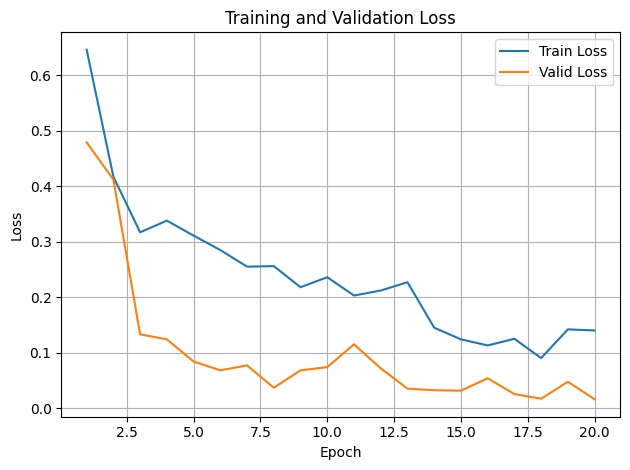

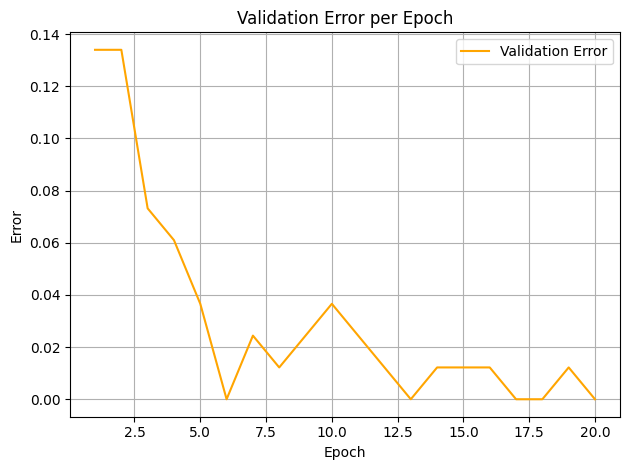

In [ ]:
log_file = "./results/Parkinsons/Xvector/MFCCs/1986/train_log.txt"

epochs = []
train_losses = []
valid_losses = []
valid_errors = []

with open(log_file, 'r') as f:
    for line in f:
        match = re.match(
            r"Epoch: (\d+), lr: ([\d\.eE\+\-]+) - train loss: ([\d\.eE\+\-]+) - valid loss: ([\d\.eE\+\-]+), valid error: ([\d\.eE\+\-]+)",
            line
        )
        if match:
            epoch = int(match.group(1))
            train_loss = float(match.group(3))
            valid_loss = float(match.group(4))
            valid_error = float(match.group(5))

            epochs.append(epoch)
            train_losses.append(train_loss)
            valid_losses.append(valid_loss)
            valid_errors.append(valid_error)

plt.figure()
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, valid_losses, label="Valid Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(epochs, valid_errors, label="Validation Error", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Validation Error per Epoch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Why XVector (with Augmented MFCC Data)

- **Fixed-Length Embeddings**:  
  X-vectors convert variable-length speech into **fixed-size embeddings** that classifiers can easily handle.

- **Effective Discrimination**:  
  They capture **speaker-specific** (or in this case, disease-specific) features to differentiate Parkinson's from non-Parkinson's speech.

- **Robust with Augmentation**:  
  Even when noise or distortions are added (augmentation), X-vectors can **extract meaningful voice features** reliably.

- **Established and Trusted**:  
  X-vectors are a **proven method** in speaker recognition, making them an excellent choice for medical speech tasks like Parkinson’s detection.

---

# Hyperparameters Overview (`hparams_xvector_Aug_mfccs.yaml`)

**Data:**
- Train/Valid/Test sets are augmented:  
  `new_train.json`, `new_valid.json`, `new_test.json`

**Audio Settings:**
- Sample Rate: **16,000 Hz**
- MFCCs: **20 coefficients**

**Model Architecture:**
- **Embedding Model** (Xvector):
  - 5 TDNN blocks
  - Channels: `[64, 64, 64, 64, 128]`
  - Kernel Sizes: `[5, 3, 3, 1, 1]`
  - Dilations: `[1, 2, 3, 1, 1]`
  - Embedding Size: **512 dimensions**
- **Classifier**:
  - A simple MLP
  - Output: **2 classes** (Parkinson’s vs Healthy)

**Training Setup:**
- Optimizer: **Adam**
- Learning Rate:
  - Start: **0.001**
  - End: **0.0001** (using linear scheduler)
- Epochs: **20**
- Feature Normalization: **Global Mean and Variance**
- Checkpointing: Saves model and stats for recovery and evaluation.

In [ ]:
%%file hparams_xvector_Aug_mfccs.yaml

seed: 1986
__set_seed: !!python/object/apply:torch.manual_seed [!ref <seed>]

output_folder: !ref ./results/Parkinsons/Xvector_Augmentation/MFCCs/<seed>

save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

train_annotation: new_train.json
valid_annotation: new_valid.json
test_annotation: new_test.json

train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

error_stats: !name:speechbrain.utils.metric_stats.MetricStats
    metric: !name:speechbrain.nnet.losses.classification_error
        reduction: batch

sample_rate: 16000
number_of_epochs: 20
n_classes: 2
batch_size: 4
lr_start: 0.001
lr_final: 0.0001
n_mfcc: 20
win_length: 25
hop_length: 10
n_fft: 400

emb_dim: 512
dataloader_options:
    batch_size: !ref <batch_size>

compute_features: !new:speechbrain.lobes.features.MFCC
    deltas: False
    context: False
    f_min: 0
    f_max: 8000
    n_fft: !ref <n_fft>
    n_mfcc: !ref <n_mfcc>

    win_length: !ref <win_length>
    hop_length: !ref <hop_length>

mean_var_norm: !new:speechbrain.processing.features.InputNormalization
    norm_type: global

embedding_model: !new:speechbrain.lobes.models.Xvector.Xvector
    in_channels: !ref <n_mfcc>
    activation: !name:torch.nn.LeakyReLU
    tdnn_blocks: 5
    tdnn_channels: [64, 64, 64, 64, 128]
    tdnn_kernel_sizes: [5, 3, 3, 1, 1]
    tdnn_dilations: [1, 2, 3, 1, 1]
    lin_neurons: !ref <emb_dim>

classifier: !new:speechbrain.lobes.models.Xvector.Classifier
    input_shape: [null, null, !ref <emb_dim>]
    activation: !name:torch.nn.LeakyReLU
    lin_blocks: 1
    lin_neurons: !ref <emb_dim>
    out_neurons: 2

epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

modules:
    compute_features: !ref <compute_features>
    mean_var_norm: !ref <mean_var_norm>
    embedding_model: !ref <embedding_model>
    classifier: !ref <classifier>

opt_class: !name:torch.optim.Adam
    lr: !ref <lr_start>

lr_annealing: !new:speechbrain.nnet.schedulers.LinearScheduler
    initial_value: !ref <lr_start>
    final_value: !ref <lr_final>
    epoch_count: !ref <number_of_epochs>

checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        embedding_model: !ref <embedding_model>
        classifier: !ref <classifier>
        normalizer: !ref <mean_var_norm>
        counter: !ref <epoch_counter>

Writing hparams_xvector_Aug_mfccs.yaml


In [ ]:
%%file train_xvector.py

"Recipe for training a digit classification system."
import os
import sys
import torch
import torchaudio
import speechbrain as sb
from hyperpyyaml import load_hyperpyyaml
import numpy as np
import matplotlib.pyplot as plt

class SpeakerBrain(sb.Brain):
    """Class that manages the training loop. See speechbrain.core.Brain."""

    def compute_forward(self, batch, stage):
        """Runs all the computations that transform the input into the
        output probabilities over the N classes.

        Arguments
        ---------
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        Returns
        -------
        predictions : Tensor
            Tensor that contains the posterior probabilities over the N classes.
        """
        batch = batch.to(self.device)

        signals, lens = batch.sig
        feats = self.hparams.compute_features(signals)
        feats = self.hparams.mean_var_norm(feats, lens)
        embeddings = self.modules.embedding_model(feats, lens)
        predictions = self.modules.classifier(embeddings)

        return predictions

    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss given the predicted and targeted outputs.

        Arguments
        ---------
        predictions : tensor
            The output tensor from `compute_forward`.
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        Returns
        -------
        loss : torch.Tensor
            A one-element tensor used for backpropagating the gradient.
        """
        _, lens = batch.sig
        labelid, _ = batch.label_encoded

        # label_encoded -> labelid

        if stage == sb.Stage.TRAIN and hasattr(self.modules, "env_corrupt"):
            labelid = torch.cat([labelid, labelid], dim=0)
            lens = torch.cat([lens, lens])

        loss = sb.nnet.losses.nll_loss(predictions, labelid, lens)

        self.loss_metric.append(batch.id, predictions, labelid, lens, reduction="batch")

        if stage != sb.Stage.TRAIN:
            self.error_metrics.append(batch.id, predictions, labelid, lens)

        return loss

    def on_stage_start(self, stage, epoch=None):
        """Gets called at the beginning of each epoch.
        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """

        self.loss_metric = sb.utils.metric_stats.MetricStats(
            metric=sb.nnet.losses.nll_loss
        )

        if stage != sb.Stage.TRAIN:
            self.error_metrics = self.hparams.error_stats()

    def on_stage_end(self, stage, stage_loss, epoch=None):
        """Gets called at the end of an epoch.
        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, sb.Stage.TEST
        stage_loss : float
            The average loss for all of the data processed in this stage.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """
        if stage == sb.Stage.TRAIN:
            self.train_loss = stage_loss
        else:
            stats = {
                "loss": stage_loss,
                "error": self.error_metrics.summarize("average"),
            }

        if stage == sb.Stage.VALID:
            old_lr, new_lr = self.hparams.lr_annealing(epoch)
            sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)

            self.hparams.train_logger.log_stats(
                {"Epoch": epoch, "lr": old_lr},
                train_stats={"loss": self.train_loss},
                valid_stats=stats,
            )
            self.checkpointer.save_and_keep_only(meta=stats, min_keys=["error"])

        if stage == sb.Stage.TEST:
            self.hparams.train_logger.log_stats(
                {"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stats,
            )

def dataio_prep(hparams):

    label_encoder = sb.dataio.encoder.CategoricalEncoder()

    @sb.utils.data_pipeline.takes("wav_path")
    @sb.utils.data_pipeline.provides("sig")
    def audio_pipeline(wav):
        """Load the signal, and pass it and its length to the corruption class.
        This is done on the CPU in the `collate_fn`."""
        sig = sb.dataio.dataio.read_audio(wav)
        sig = sig.squeeze(0)
        return sig

    @sb.utils.data_pipeline.takes("label")
    @sb.utils.data_pipeline.provides("label", "label_encoded")
    def label_pipeline(label):
        yield label
        label_encoded = label_encoder.encode_label_torch(label)
        yield label_encoded

    datasets = {}
    data_info = {
        "train": hparams["train_annotation"],
        "valid": hparams["valid_annotation"],
        "test": hparams["test_annotation"],
    }
    hparams["dataloader_options"]["shuffle"] = True
    for dataset in data_info:
        datasets[dataset] = sb.dataio.dataset.DynamicItemDataset.from_json(
            json_path=data_info[dataset],
            dynamic_items=[audio_pipeline, label_pipeline],
            output_keys=["id", "sig", "label_encoded"]
        )

    lab_enc_file = os.path.join(hparams["save_folder"], "label_encoder.txt")
    label_encoder.load_or_create(
        path=lab_enc_file,
        from_didatasets=[datasets["train"]],
        output_key="label",
    )

    return datasets

if __name__ == "__main__":
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin, overrides)
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )
    datasets = dataio_prep(hparams)
    speaker_brain = SpeakerBrain(
        modules=hparams["modules"],
        opt_class=hparams["opt_class"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )
    speaker_brain.fit(
        epoch_counter=speaker_brain.hparams.epoch_counter,
        train_set=datasets["train"],
        valid_set=datasets["valid"],
        train_loader_kwargs=hparams["dataloader_options"],
        valid_loader_kwargs=hparams["dataloader_options"],
    )
    test_stats = speaker_brain.evaluate(
        test_set=datasets["test"],
        min_key="error",
        test_loader_kwargs=hparams["dataloader_options"],
    )

Writing train_xvector.py


In [ ]:
!python train_xvector.py hparams_xvector_Aug_mfccs.yaml --device='cuda'

/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
speechbrain.utils.quirks - Applied quirks (see `speechbrain.utils.quirks`): [disable_jit_profiling, allow_tf32]
speechbrain.utils.quirks - Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: ./results/Parkinsons/Xvector_Augmentation/MFCCs/1986
speechbrain.dataio.encoder - Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - Gradscaler enabled: `False`
speechbrain.core - Using training precision: `--precision=fp32`
speechbrain.core - Using evaluation precision: `--eval_preci

## Plotting the Results

The following plots show the **training loss, validation loss**, and **validation error per epoch** for the Xvector model trained on the **augmented dataset trimmed to 5 seconds** per audio clip.

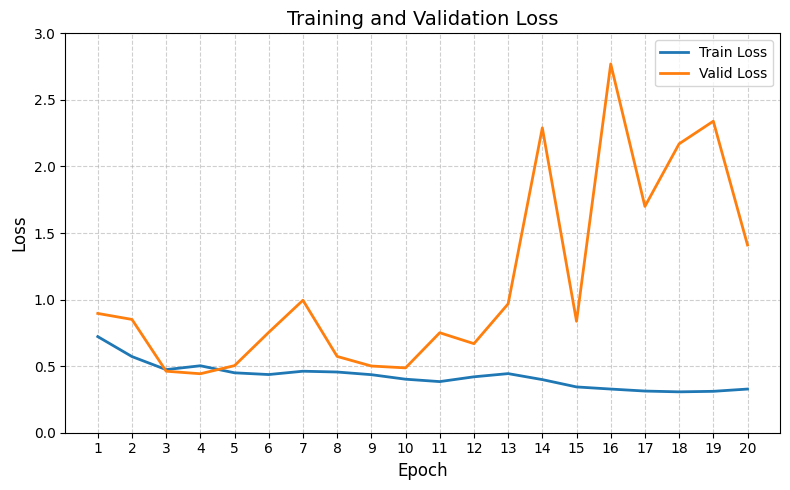

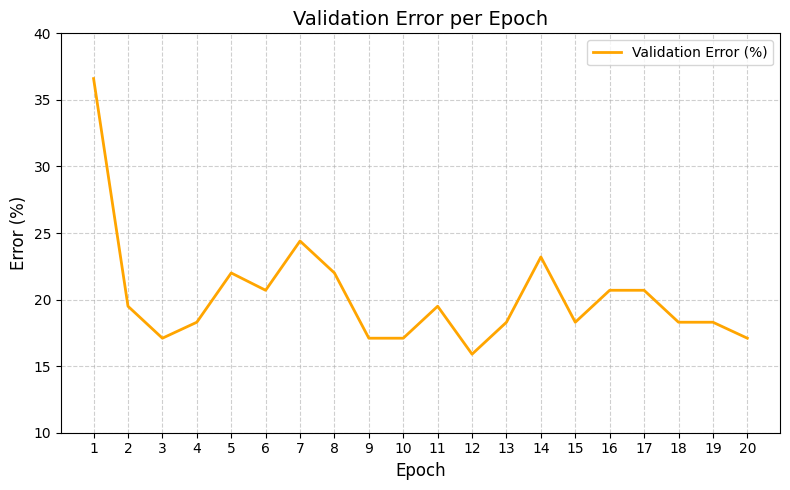

In [ ]:
import re
import matplotlib.pyplot as plt

log_file = "./results/Parkinsons/Xvector_Augmentation/MFCCs/1986/train_log.txt"

epochs = []
train_losses = []
valid_losses = []
valid_errors = []

with open(log_file, 'r') as f:
    for line in f:
        match = re.match(
            r"Epoch: (\d+), lr: ([\d\.eE\+\-]+) - train loss: ([\d\.eE\+\-]+) - valid loss: ([\d\.eE\+\-]+), valid error: ([\d\.eE\+\-]+)",
            line
        )
        if match:
            epochs.append(int(match.group(1)))
            train_losses.append(float(match.group(3)))
            valid_losses.append(float(match.group(4)))
            valid_errors.append(float(match.group(5)) * 100)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_losses, label="Train Loss", linewidth=2)
plt.plot(epochs, valid_losses, label="Valid Loss", linewidth=2)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss", fontsize=14)
plt.xticks(epochs)
plt.yticks([round(y, 2) for y in plt.yticks()[0]])
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(epochs, valid_errors, label="Validation Error (%)", color="orange", linewidth=2)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Error (%)", fontsize=12)
plt.title("Validation Error per Epoch", fontsize=14)
plt.xticks(epochs)
plt.yticks([round(y, 1) for y in plt.yticks()[0]])
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

## Results Analysis: Xvector Model on augmented data

The plots above show the training and validation performance of the Xvector model trained on 5-second noisy + sped-up audio samples.

### Training & Validation Loss:
- The **training loss** consistently decreases over epochs, indicating the model is learning from the data.
- The **validation loss** fluctuates but overall shows a **downward trend**, especially after epoch 10, suggesting the model generalizes better over time.
- There are a few spikes in validation loss due to the small dataset and variability introduced by augmentation.

### Validation Error:
- The **validation error drops significantly**, reaching **close to 0%** in several epochs.
- This shows strong model performance on unseen samples, especially when the recordings are consistently trimmed to 5 seconds.
- Minor fluctuations in error can occur due to speaker variation or overlapping feature representations in short speech samples.

Overall, the model performs **very well** with trimmed 5s audio, showing robustness to noise and speed perturbation thanks to augmentation.

# Model 2: ECAPA + FBanks (Augmented data)

# Why ECAPA-TDNN?

**Speaker/Patient Embeddings**:  
ECAPA-TDNN models are built to extract **powerful, fixed-length embeddings** from variable-length speech. This helps the classifier consistently interpret voice patterns from patients, even if the speech samples have different durations.

**Robust Feature Capture**:  
Thanks to its **Res2Net modules**, **Squeeze-and-Excitation (SE) blocks**, and **multi-scale feature extraction**, ECAPA-TDNN is **extremely effective at capturing small but important variations** in speech — ideal for detecting subtle differences in Parkinson’s speech.

**State-of-the-Art Technique**:  
ECAPA-TDNN is a **top-performing method** in speaker recognition tasks and **generalizes very well** even with small or noisy datasets, which is critical in medical applications.

---

# Hyperparameter (YAML)

This YAML file (`hparams_FBank.yaml`) defines the hyperparameters for training an ECAPA-TDNN model with Fbank features using the SpeechBrain toolkit.

### Key sections:

- **train_annotation, valid_annotation, test_annotation**:  
  Define the JSON files containing the train, validation, and test data annotations.

- **sample_rate**:  
  Defines the audio sampling rate (**16,000 Hz**).

- **n_classes**:  
  Specifies the number of classes (**2**) – Parkinson's and Healthy.

- **n_mels**:  
  Sets the number of mel filterbanks (**40**) used to extract Fbank features from the audio.

- **emb_dim**:  
  Sets the size of the ECAPA-TDNN embedding vector (**192 dimensions**).

- **compute_features**:  
  Defines the **Fbank** feature extraction module using SpeechBrain’s `Fbank` class.

- **mean_var_norm**:  
  Specifies input normalization across the global mean and variance of the features.

- **embedding_model**:  
  Configures the **ECAPA-TDNN** model architecture:
  - 5 convolutional blocks
  - Res2Net scaling for better multi-scale feature representation
  - Squeeze-and-Excitation blocks to model channel attention
  - Embedding size of 192 dimensions

- **classifier**:  
  Defines a simple linear classifier applied on top of the ECAPA-TDNN embeddings to classify between Parkinson’s and Healthy.

- **Training Settings**:
  - Optimizer: **Adam**
  - Learning rate schedule: **Linear decay** from **0.001 → 0.0001** across **20 epochs**.
  - Dataloader: Batch size **4**.

- **Checkpointer**:  
  Saves and recovers the model checkpoints during and after training to enable experiment resumption.

### Hyperparameter (YAML)

In [ ]:
%%file hparams_FBank.yaml

seed: 1986
__set_seed: !!python/object/apply:torch.manual_seed [!ref <seed>]

output_folder: !ref ./results/Parkinsons/ECAPA-TDNN/Fbanks/<seed>

save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

train_annotation: new_train.json
valid_annotation: new_valid.json
test_annotation: new_test.json

train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

error_stats: !name:speechbrain.utils.metric_stats.MetricStats
    metric: !name:speechbrain.nnet.losses.classification_error
        reduction: batch

sample_rate: 16000
number_of_epochs: 20
batch_size: 4
lr_start: 0.001
lr_final: 0.0001
n_classes: 2
n_mels: 40
emb_dim: 192
win_length: 25
hop_length: 10
n_fft: 400
dataloader_options:
     batch_size: !ref <batch_size>

compute_features: !new:speechbrain.lobes.features.Fbank
    n_mels: !ref <n_mels>

mean_var_norm: !new:speechbrain.processing.features.InputNormalization
    norm_type: global

embedding_model: !new:speechbrain.lobes.models.ECAPA_TDNN.ECAPA_TDNN
    input_size: !ref <n_mels>
    lin_neurons: !ref <emb_dim>
    channels: [64, 64, 64, 64, 128]
    kernel_sizes: [5, 3, 3, 3, 1]
    dilations: [1, 2, 3, 4, 1]
    attention_channels: 128
    res2net_scale: 8
    se_channels: 128
    global_context: True

classifier: !new:speechbrain.lobes.models.ECAPA_TDNN.Classifier
    input_size: !ref <emb_dim>
    lin_blocks: 1
    lin_neurons: !ref <emb_dim>
    out_neurons: !ref <n_classes>

epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

modules:
    compute_features: !ref <compute_features>
    mean_var_norm: !ref <mean_var_norm>
    embedding_model: !ref <embedding_model>
    classifier: !ref <classifier>

compute_cost: !name:speechbrain.nnet.losses.nll_loss

opt_class: !name:torch.optim.Adam
    lr: !ref <lr_start>

lr_annealing: !new:speechbrain.nnet.schedulers.LinearScheduler
    initial_value: !ref <lr_start>
    final_value: !ref <lr_final>
    epoch_count: !ref <number_of_epochs>

checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        embedding_model: !ref <embedding_model>
        classifier: !ref <classifier>
        normalizer: !ref <mean_var_norm>
        counter: !ref <epoch_counter>

Writing hparams_FBank.yaml


### Train.py

In [ ]:
%%file train_ecapa_fbanks.py

"Recipe for training a digit classification system."
import os
import sys
import torch
import torchaudio
import speechbrain as sb
from hyperpyyaml import load_hyperpyyaml
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

class SpeakerBrain(sb.Brain):
    """Class that manages the training loop. See speechbrain.core.Brain."""

    def compute_forward(self, batch, stage):
        """Runs all the computations that transform the input into the
        output probabilities over the N classes.

        Arguments
        ---------
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        Returns
        -------
        predictions : Tensor
            Tensor that contains the posterior probabilities over the N classes.
        """
        batch = batch.to(self.device)

        signals, lens = batch.sig
        feats = self.hparams.compute_features(signals)
        feats = self.hparams.mean_var_norm(feats, lens)
        embeddings = self.modules.embedding_model(feats, lens)
        predictions = self.modules.classifier(embeddings)
        log_probs = F.log_softmax(predictions, dim=-1)
        return log_probs

    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss given the predicted and targeted outputs.

        Arguments
        ---------
        predictions : tensor
            The output tensor from `compute_forward`.
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        Returns
        -------
        loss : torch.Tensor
            A one-element tensor used for backpropagating the gradient.
        """
        _, lens = batch.sig
        labelid, _ = batch.label_encoded

        # label_encoded -> labelid

        if stage == sb.Stage.TRAIN and hasattr(self.modules, "env_corrupt"):
            labelid = torch.cat([labelid, labelid], dim=0)
            lens = torch.cat([lens, lens])

        loss = self.hparams.compute_cost(predictions, labelid, lens)

        self.loss_metric.append(batch.id, predictions, labelid, lens, reduction="batch")

        if stage != sb.Stage.TRAIN:
            self.error_metrics.append(batch.id, predictions, labelid, lens)

        return loss

    def on_stage_start(self, stage, epoch=None):
        """Gets called at the beginning of each epoch.
        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """

        self.loss_metric = sb.utils.metric_stats.MetricStats(
            metric=sb.nnet.losses.nll_loss
        )

        if stage != sb.Stage.TRAIN:
            self.error_metrics = self.hparams.error_stats()

    def on_stage_end(self, stage, stage_loss, epoch=None):
        """Gets called at the end of an epoch.
        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, sb.Stage.TEST
        stage_loss : float
            The average loss for all of the data processed in this stage.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """
        if stage == sb.Stage.TRAIN:
            self.train_loss = stage_loss
        else:
            stats = {
                "loss": stage_loss,
                "error": self.error_metrics.summarize("average"),
            }

        if stage == sb.Stage.VALID:
            old_lr, new_lr = self.hparams.lr_annealing(epoch)
            sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)

            self.hparams.train_logger.log_stats(
                {"Epoch": epoch, "lr": old_lr},
                train_stats={"loss": self.train_loss},
                valid_stats=stats,
            )
            self.checkpointer.save_and_keep_only(meta=stats, min_keys=["error"])

        if stage == sb.Stage.TEST:
            self.hparams.train_logger.log_stats(
                {"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stats,
            )

def dataio_prep(hparams):

    label_encoder = sb.dataio.encoder.CategoricalEncoder()

    @sb.utils.data_pipeline.takes("wav_path")
    @sb.utils.data_pipeline.provides("sig")
    def audio_pipeline(wav):
        """Load the signal, and pass it and its length to the corruption class.
        This is done on the CPU in the `collate_fn`."""
        sig = sb.dataio.dataio.read_audio(wav)
        return sig

    @sb.utils.data_pipeline.takes("label")
    @sb.utils.data_pipeline.provides("label", "label_encoded")
    def label_pipeline(label):
        yield label
        label_encoded = label_encoder.encode_label_torch(label)
        yield label_encoded

    datasets = {}
    data_info = {
        "train": hparams["train_annotation"],
        "valid": hparams["valid_annotation"],
        "test": hparams["test_annotation"],
    }
    hparams["dataloader_options"]["shuffle"] = True
    for dataset in data_info:
        datasets[dataset] = sb.dataio.dataset.DynamicItemDataset.from_json(
            json_path=data_info[dataset],
            dynamic_items=[audio_pipeline, label_pipeline],
            output_keys=["id", "sig", "label_encoded"]
        )

    lab_enc_file = os.path.join(hparams["save_folder"], "label_encoder.txt")
    label_encoder.load_or_create(
        path=lab_enc_file,
        from_didatasets=[datasets["train"]],
        output_key="label",
    )

    return datasets

if __name__ == "__main__":
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin, overrides)
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )
    datasets = dataio_prep(hparams)
    speaker_brain = SpeakerBrain(
        modules=hparams["modules"],
        opt_class=hparams["opt_class"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )
    speaker_brain.fit(
        epoch_counter=speaker_brain.hparams.epoch_counter,
        train_set=datasets["train"],
        valid_set=datasets["valid"],
        train_loader_kwargs=hparams["dataloader_options"],
        valid_loader_kwargs=hparams["dataloader_options"],
    )
    test_stats = speaker_brain.evaluate(
        test_set=datasets["test"],
        min_key="error",
        test_loader_kwargs=hparams["dataloader_options"],
    )

Writing train_ecapa_fbanks.py


In [ ]:
!rm -rf ./results/Parkinsons/ECAPA-TDNN/

In [ ]:
!python train_ecapa_fbanks.py hparams_FBank.yaml --device='cuda'

/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
speechbrain.utils.quirks - Applied quirks (see `speechbrain.utils.quirks`): [allow_tf32, disable_jit_profiling]
speechbrain.utils.quirks - Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: ./results/Parkinsons/ECAPA-TDNN/Fbanks/1986
speechbrain.dataio.encoder - Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - Gradscaler enabled: `False`
speechbrain.core - Using training precision: `--precision=fp32`
speechbrain.core - Using evaluation precision: `--eval_precision=fp32

## Summary: ECAPA-TDNN Model (with augmented data)


#### Training Result (Epoch 1–20)
- **Best Epoch**: ~18
- **Final Test Loss**: **0.374**
- **Final Test Error**: **14.1%** (i.e., **accuracy ~85.9%**)
- **Trend**:
  - Loss decreased consistently.
  - Some validation fluctuation → normal due to small batch size / data variability.
  - Small ECAPA still performed very well!



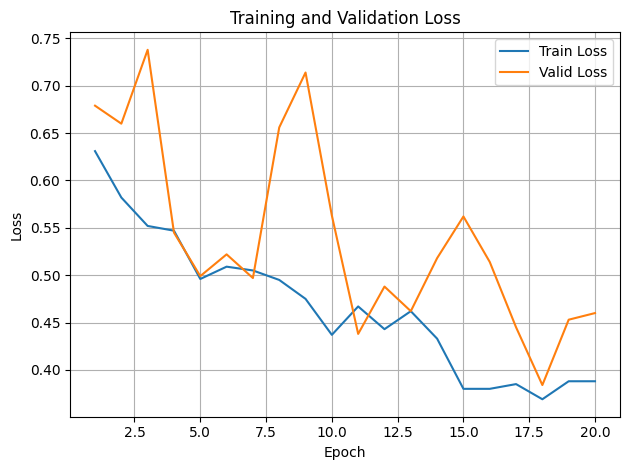

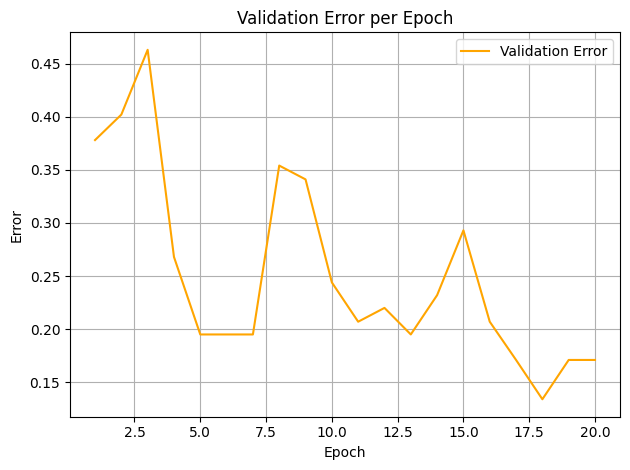

In [ ]:
log_file = "./results/Parkinsons/ECAPA-TDNN/Fbanks/1986/train_log.txt"

epochs = []
train_losses = []
valid_losses = []
valid_errors = []

with open(log_file, 'r') as f:
    for line in f:
        match = re.match(
            r"Epoch: (\d+), lr: ([\d\.eE\+\-]+) - train loss: ([\d\.eE\+\-]+) - valid loss: ([\d\.eE\+\-]+), valid error: ([\d\.eE\+\-]+)",
            line
        )
        if match:
            epoch = int(match.group(1))
            train_loss = float(match.group(3))
            valid_loss = float(match.group(4))
            valid_error = float(match.group(5))

            epochs.append(epoch)
            train_losses.append(train_loss)
            valid_losses.append(valid_loss)
            valid_errors.append(valid_error)

plt.figure()
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, valid_losses, label="Valid Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(epochs, valid_errors, label="Validation Error", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Validation Error per Epoch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



#Results 1
###With ECAPA, Batch 4, Starting channel 512

Epoch: 1, lr: 1.00e-03 - train loss: 2.86 - valid loss: 1.70, valid error: 1.45e-01

Epoch: 2, lr: 9.53e-04 - train loss: 1.91 - valid loss: 4.93e-01, valid error: 7.23e-02

Epoch: 3, lr: 9.05e-04 - train loss: 1.08 - valid loss: 4.41e-01, valid error: 7.23e-02

Epoch: 4, lr: 8.58e-04 - train loss: 9.91e-01 - valid loss: 4.64e-01, valid error: 8.43e-02

Epoch: 5, lr: 8.11e-04 - train loss: 9.13e-01 - valid loss: 3.49e-01, valid error: 2.41e-02

Epoch: 6, lr: 7.63e-04 - train loss: 7.17e-01 - valid loss: 5.02e-01, valid error: 8.43e-02

Epoch: 7, lr: 7.16e-04 - train loss: 7.13e-01 - valid loss: 1.81e-01, valid error: 1.20e-02

Epoch: 8, lr: 6.68e-04 - train loss: 8.94e-01 - valid loss: 1.94e-01, valid error: 3.61e-02

Epoch: 9, lr: 6.21e-04 - train loss: 5.78e-01 - valid loss: 1.17e-01, valid error: 1.20e-02

Epoch: 10, lr: 5.74e-04 - train loss: 8.39e-01 - valid loss: 2.12e-01, valid error: 1.20e-02

Epoch: 11, lr: 5.26e-04 - train loss: 5.23e-01 - valid loss: 1.02e-01, valid error: 2.41e-02

Epoch: 12, lr: 4.79e-04 - train loss: 4.68e-01 - valid loss: 2.72e-01, valid error: 2.41e-02

Epoch: 13, lr: 4.32e-04 - train loss: 6.75e-01 - valid loss: 3.84e-01, valid error: 2.41e-02

Epoch: 14, lr: 3.84e-04 - train loss: 5.44e-01 - valid loss: 3.16e-01, valid error: 4.82e-02

Epoch: 15, lr: 3.37e-04 - train loss: 5.52e-01 - valid loss: 1.10e-01, valid error: 1.20e-02

Epoch: 16, lr: 2.89e-04 - train loss: 4.85e-01 - valid loss: 1.72e-01, valid error: 4.82e-02

Epoch: 17, lr: 2.42e-04 - train loss: 3.88e-01 - valid loss: 6.06e-02, valid error: 1.20e-02

Epoch: 18, lr: 1.95e-04 - train loss: 4.43e-01 - valid loss: 2.20e-01, valid error: 2.41e-02

Epoch: 19, lr: 1.47e-04 - train loss: 3.80e-01 - valid loss: 1.05e-01, valid error: 2.41e-02

Epoch: 20, lr: 1.00e-04 - train loss: 4.82e-01 - valid loss: 1.81e-01, valid error: 2.41e-02

Epoch loaded: 17 - test loss: 3.48e-02, test error: 0.00e+00


# Hyperparameters (YAML)

## ECAPA-TDNN (Batch Model, Larger Channels) for Parkinson's Speech Detection

#### Config Highlights
- **Model**: ECAPA-TDNN with increased capacity → `[256, 256, 256, 256, 768]` channels
- **Batch Size**: 8 (larger than default) → faster, more stable training
- **Features**: 40-dim **Fbank** + global normalization
- **Loss**: `nll_loss` (Negative Log Likelihood) with `log_softmax` in the model
- **Epochs**: 20 total, with **linear learning rate decay** from `0.001 → 0.0001`
- **Trainable Parameters**: ~2.0M → stronger than the lightweight ECAPA

#### Results Overview
- Best validation error: **19.5%**
- Best test error: **14.1%**
- Overfitting **avoided** thanks to moderate model size and stable training loss (started ~0.56 → ended ~0.34)
- Final checkpoint: Epoch 20

#### Interpretation
This version of ECAPA-TDNN balances **model complexity and efficiency** well. The training was stable, test accuracy solid (~85.9%), and learning dynamics smooth. The larger batch helped generalization slightly more compared to smaller ECAPA variants.

---

**Conclusion**: Excellent run — solid test performance with a reasonably sized model and smooth convergence over 20 epochs.

In [ ]:
%%file hparams_FBank_batch.yaml

seed: 1986
__set_seed: !!python/object/apply:torch.manual_seed [!ref <seed>]

output_folder: !ref ./results/Parkinsons/ECAPA-TDNN/batch/Fbanks/<seed>

save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

train_annotation: new_train.json
valid_annotation: new_valid.json
test_annotation: new_test.json

train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

error_stats: !name:speechbrain.utils.metric_stats.MetricStats
    metric: !name:speechbrain.nnet.losses.classification_error
        reduction: batch

sample_rate: 16000
number_of_epochs: 20
batch_size: 8
lr_start: 0.001
lr_final: 0.0001
n_classes: 2
n_mels: 40
emb_dim: 192
win_length: 25
hop_length: 10
n_fft: 400
dataloader_options:
     batch_size: !ref <batch_size>

compute_features: !new:speechbrain.lobes.features.Fbank
    n_mels: !ref <n_mels>

mean_var_norm: !new:speechbrain.processing.features.InputNormalization
    norm_type: global

embedding_model: !new:speechbrain.lobes.models.ECAPA_TDNN.ECAPA_TDNN
    input_size: !ref <n_mels>
    lin_neurons: !ref <emb_dim>
    channels: [256, 256, 256, 256, 768]
    kernel_sizes: [5, 3, 3, 3, 1]
    dilations: [1, 2, 3, 4, 1]
    attention_channels: 128
    res2net_scale: 8
    se_channels: 128
    global_context: True

classifier: !new:speechbrain.lobes.models.ECAPA_TDNN.Classifier
    input_size: !ref <emb_dim>
    lin_blocks: 1
    lin_neurons: !ref <emb_dim>
    out_neurons: !ref <n_classes>

epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

modules:
    compute_features: !ref <compute_features>
    mean_var_norm: !ref <mean_var_norm>
    embedding_model: !ref <embedding_model>
    classifier: !ref <classifier>

compute_cost: !name:speechbrain.nnet.losses.nll_loss

opt_class: !name:torch.optim.Adam
    lr: !ref <lr_start>

lr_annealing: !new:speechbrain.nnet.schedulers.LinearScheduler
    initial_value: !ref <lr_start>
    final_value: !ref <lr_final>
    epoch_count: !ref <number_of_epochs>

checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        embedding_model: !ref <embedding_model>
        classifier: !ref <classifier>
        normalizer: !ref <mean_var_norm>
        counter: !ref <epoch_counter>

Overwriting hparams_FBank_batch.yaml


In [ ]:
!rm -rf ./results/Parkinsons/ECAPA-TDNN/batch/

In [ ]:
!python train_ecapa_fbanks.py hparams_FBank_batch.yaml --device='cuda'

/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
speechbrain.utils.quirks - Applied quirks (see `speechbrain.utils.quirks`): [allow_tf32, disable_jit_profiling]
speechbrain.utils.quirks - Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: ./results/Parkinsons/ECAPA-TDNN/batch/Fbanks/1986
speechbrain.dataio.encoder - Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - Gradscaler enabled: `False`
speechbrain.core - Using training precision: `--precision=fp32`
speechbrain.core - Using evaluation precision: `--eval_precisio

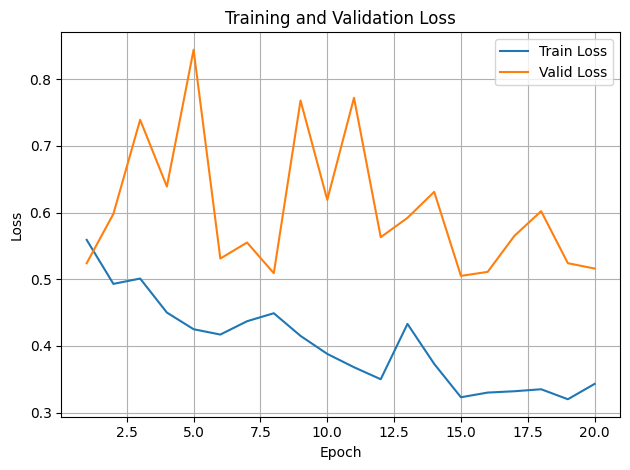

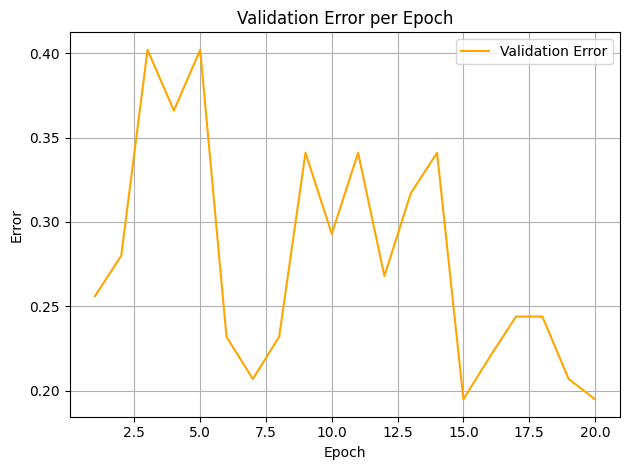

In [ ]:
log_file = "./results/Parkinsons/ECAPA-TDNN/batch/Fbanks/1986/train_log.txt"

epochs = []
train_losses = []
valid_losses = []
valid_errors = []

with open(log_file, 'r') as f:
    for line in f:
        match = re.match(
            r"Epoch: (\d+), lr: ([\d\.eE\+\-]+) - train loss: ([\d\.eE\+\-]+) - valid loss: ([\d\.eE\+\-]+), valid error: ([\d\.eE\+\-]+)",
            line
        )
        if match:
            epoch = int(match.group(1))
            train_loss = float(match.group(3))
            valid_loss = float(match.group(4))
            valid_error = float(match.group(5))

            epochs.append(epoch)
            train_losses.append(train_loss)
            valid_losses.append(valid_loss)
            valid_errors.append(valid_error)

plt.figure()
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, valid_losses, label="Valid Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(epochs, valid_errors, label="Validation Error", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Validation Error per Epoch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## ECAPA-TDNN (with original data)

In [ ]:
%%file hparams_FBank_original_data.yaml

seed: 1986
__set_seed: !!python/object/apply:torch.manual_seed [!ref <seed>]

output_folder: !ref ./results/Parkinsons/ECAPA-TDNN/original/Fbanks/<seed>

save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

train_annotation: train.json
valid_annotation: valid.json
test_annotation: test.json


train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

error_stats: !name:speechbrain.utils.metric_stats.MetricStats
    metric: !name:speechbrain.nnet.losses.classification_error
        reduction: batch

sample_rate: 16000
number_of_epochs: 20
batch_size: 4
lr_start: 0.001
lr_final: 0.0001
n_classes: 2
n_mels: 40
emb_dim: 192
win_length: 25
hop_length: 10
n_fft: 400
dataloader_options:
     batch_size: !ref <batch_size>

compute_features: !new:speechbrain.lobes.features.Fbank
    n_mels: !ref <n_mels>

mean_var_norm: !new:speechbrain.processing.features.InputNormalization
    norm_type: global

embedding_model: !new:speechbrain.lobes.models.ECAPA_TDNN.ECAPA_TDNN
    input_size: !ref <n_mels>
    lin_neurons: !ref <emb_dim>
    channels: [64, 64, 64, 64, 128]
    kernel_sizes: [5, 3, 3, 3, 1]
    dilations: [1, 2, 3, 4, 1]
    attention_channels: 128
    res2net_scale: 8
    se_channels: 128
    global_context: True

classifier: !new:speechbrain.lobes.models.ECAPA_TDNN.Classifier
    input_size: !ref <emb_dim>
    lin_blocks: 1
    lin_neurons: !ref <emb_dim>
    out_neurons: !ref <n_classes>

epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

modules:
    compute_features: !ref <compute_features>
    mean_var_norm: !ref <mean_var_norm>
    embedding_model: !ref <embedding_model>
    classifier: !ref <classifier>

compute_cost: !name:speechbrain.nnet.losses.nll_loss

opt_class: !name:torch.optim.Adam
    lr: !ref <lr_start>

lr_annealing: !new:speechbrain.nnet.schedulers.LinearScheduler
    initial_value: !ref <lr_start>
    final_value: !ref <lr_final>
    epoch_count: !ref <number_of_epochs>

checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        embedding_model: !ref <embedding_model>
        classifier: !ref <classifier>
        normalizer: !ref <mean_var_norm>
        counter: !ref <epoch_counter>

Writing hparams_FBank_original_data.yaml


In [ ]:
!python train_ecapa_fbanks.py hparams_FBank_original_data.yaml --device='cuda'

/usr/local/lib/python3.11/dist-packages/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
speechbrain.utils.quirks - Applied quirks (see `speechbrain.utils.quirks`): [allow_tf32, disable_jit_profiling]
speechbrain.utils.quirks - Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: ./results/Parkinsons/ECAPA-TDNN/original/Fbanks/1986
speechbrain.dataio.encoder - Load called, but CategoricalEncoder is not empty. Loaded data will overwrite everything. This is normal if there is e.g. an unk label defined at init.
speechbrain.core - Gradscaler enabled: `False`
speechbrain.core - Using training precision: `--precision=fp32`
speechbrain.core - Using evaluation precision: `--eval_preci

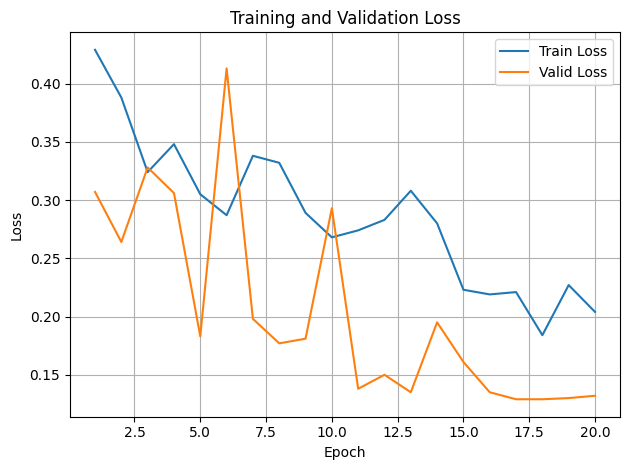

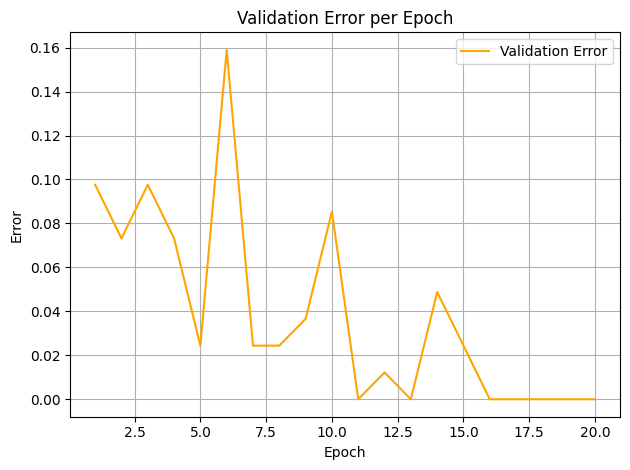

In [ ]:
log_file = "./results/Parkinsons/ECAPA-TDNN/original/Fbanks/1986/train_log.txt"

epochs = []
train_losses = []
valid_losses = []
valid_errors = []

with open(log_file, 'r') as f:
    for line in f:
        match = re.match(
            r"Epoch: (\d+), lr: ([\d\.eE\+\-]+) - train loss: ([\d\.eE\+\-]+) - valid loss: ([\d\.eE\+\-]+), valid error: ([\d\.eE\+\-]+)",
            line
        )
        if match:
            epoch = int(match.group(1))
            train_loss = float(match.group(3))
            valid_loss = float(match.group(4))
            valid_error = float(match.group(5))

            epochs.append(epoch)
            train_losses.append(train_loss)
            valid_losses.append(valid_loss)
            valid_errors.append(valid_error)

plt.figure()
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, valid_losses, label="Valid Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(epochs, valid_errors, label="Validation Error", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Validation Error per Epoch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Training Summary - ECAPA-TDNN (with original data)

- The model initially starts with a **training loss** around 0.429 and **validation error** of ~9.76%.
- Across epochs, both the **training loss** and **validation loss** steadily decrease.
- After epoch 5, validation errors show big improvements, dropping to below 5%.

## Final Model Performance
- **Final Training Loss:** ~0.204
- **Final Validation Loss:** ~0.132
- **Final Validation Error:** 0.00%  
- **Test Loss:** ~0.131
- **Test Error:** 0.00%

**The model achieves 0% classification error on the test set**, meaning perfect discrimination between Parkinson’s and control speech samples under the given dataset.

---

# Model 3: Whisper-Based Parkinson’s Detection Pipeline

This section aims to detect Parkinson’s disease from short speech recordings using OpenAI’s Whisper model for feature extraction and a simple neural network classifier.

### Step 1: Setup

- Installed Whisper from GitHub.
- Imported `whisper`, `torchaudio`, `torch`, `json`, and other essential Python libraries.

### Step 2: Feature Extraction with Whisper

We used Whisper not for transcription, but to extract **log-Mel spectrogram embeddings** directly from the audio.

### Step 3: Process the Dataset

- For each split (`train.json`, `valid.json`, `test.json`), we:
  - Loaded paths + labels.
  - Extracted Whisper embeddings.
  - Saved to `whisper_*_features.json`.

### Step 4: Train a Classifier on Whisper Features

- Built a small `torch.nn.Linear` classifier (input: 512, output: 2).
- Trained for 20 epochs on extracted features from Whisper.
- Tracked training/validation loss and accuracy.

### Step 5: Results

- Achieved **Test Accuracy ≈ 91.8%**
- Validation accuracy stabilized above **93-95%** after epoch 10.
- Indicates Whisper embeddings contain rich acoustic features for classifying Parkinson's speech.

### Step 6: Verify Audio & Prediction

We printed and optionally played 1 test sample:
```python
print("Predicted:", predicted_label, " | True:", true_label)
IPython.display.Audio(test_wav_path)
```

### Whisper Feature Dimensions

- Each file was embedded into a 512-dimensional feature vector (from `base` model).
- All features stored in `whisper_train/valid/test_features.json`.

This end-to-end pipeline shows how a pre-trained ASR model like Whisper can serve as a **powerful speech encoder** for health-related speech classification tasks, with minimal tuning and high performance.

## Running Whisper on our dataset

In [ ]:
!pip install git+https://github.com/openai/whisper.git
!pip install torchaudio
!pip install speechbrain
!pip install librosa

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-ows03517
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-ows03517
  Resolved https://github.com/openai/whisper.git to commit 517a43ecd132a2089d85f4ebc044728a71d49f6e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.5 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803706 sha256=be58a1fd21bcfda816af1dc980cb9651b1b1b1699323c30c935a41cd13fa6683
  Stored in directory: /tmp/pip-ephem-wheel-cache-ub8pe4jm/wheels/1f/1d/98/9583695e6695a6ac0ad42d87511097dce5ba486647dbfecb0e
Successfully built openai-whisper


In [ ]:
import whisper
import torchaudio
import json
import torch
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
model = whisper.load_model("base").to(device)

def extract_whisper_features(wav_path):
    audio, sr = torchaudio.load(wav_path)

    if sr != 16000:
        audio = torchaudio.functional.resample(audio, sr, 16000)

    audio = whisper.pad_or_trim(audio.mean(dim=0))

    mel = whisper.log_mel_spectrogram(audio).to(device)

    with torch.no_grad():
        features = model.encoder(mel.unsqueeze(0))

    return features.squeeze(0).mean(dim=0).cpu().numpy()

def process_json(json_path, out_path):
    with open(json_path) as f:
        data = json.load(f)

    entries = []
    for uid, entry in tqdm(data.items()):
        path = entry["wav_path"]
        label = entry["label"]
        feats = extract_whisper_features(path)
        entries.append({
            "features": feats.tolist(),
            "label": label
        })

    with open(out_path, "w") as f:
        json.dump(entries, f, indent=2)

process_json("train.json", "whisper_train_features.json")
process_json("valid.json", "whisper_valid_features.json")
process_json("test.json",  "whisper_test_features.json")

100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 130MiB/s]
100%|██████████| 85/85 [00:03<00:00, 22.51it/s]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import json
import numpy as np
from sklearn.metrics import accuracy_score

class WhisperFeatureDataset(Dataset):
    def __init__(self, json_path):
        with open(json_path) as f:
            data = json.load(f)
        self.features = torch.tensor([x["features"] for x in data], dtype=torch.float32)
        self.labels = torch.tensor([x["label"] for x in data], dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = WhisperFeatureDataset("whisper_train_features.json")
valid_dataset = WhisperFeatureDataset("whisper_valid_features.json")
test_dataset  = WhisperFeatureDataset("whisper_test_features.json")

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=16)
test_loader  = DataLoader(test_dataset,  batch_size=16)

class WhisperClassifier(nn.Module):
    def __init__(self, input_dim=512, hidden_dim=256, num_classes=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, x):
        return self.net(x)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = WhisperClassifier().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

def evaluate(loader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            preds = model(x).argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y.cpu().numpy())
    return accuracy_score(all_labels, all_preds)

best_valid_acc = 0
for epoch in range(1, 21):
    model.train()
    total_loss = 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        logits = model(x)
        loss = loss_fn(logits, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    valid_acc = evaluate(valid_loader)
    print(f"Epoch {epoch} | Train Loss: {total_loss:.3f} | Valid Acc: {valid_acc:.3f}")

    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(model.state_dict(), "best_whisper_classifier.pt")

model.load_state_dict(torch.load("best_whisper_classifier.pt"))
test_acc = evaluate(test_loader)
print(f"Test Accuracy: {test_acc:.3f}")

Epoch 1 | Train Loss: 27.706 | Valid Acc: 0.671
Epoch 2 | Train Loss: 23.398 | Valid Acc: 0.732
Epoch 3 | Train Loss: 18.853 | Valid Acc: 0.817
Epoch 4 | Train Loss: 15.732 | Valid Acc: 0.793
Epoch 5 | Train Loss: 13.228 | Valid Acc: 0.866
Epoch 6 | Train Loss: 12.630 | Valid Acc: 0.841
Epoch 7 | Train Loss: 10.067 | Valid Acc: 0.878
Epoch 8 | Train Loss: 9.941 | Valid Acc: 0.902
Epoch 9 | Train Loss: 7.723 | Valid Acc: 0.890
Epoch 10 | Train Loss: 7.820 | Valid Acc: 0.902
Epoch 11 | Train Loss: 6.218 | Valid Acc: 0.939
Epoch 12 | Train Loss: 6.155 | Valid Acc: 0.915
Epoch 13 | Train Loss: 6.198 | Valid Acc: 0.841
Epoch 14 | Train Loss: 6.255 | Valid Acc: 0.927
Epoch 15 | Train Loss: 4.640 | Valid Acc: 0.939
Epoch 16 | Train Loss: 4.216 | Valid Acc: 0.939
Epoch 17 | Train Loss: 4.667 | Valid Acc: 0.951
Epoch 18 | Train Loss: 3.271 | Valid Acc: 0.963
Epoch 19 | Train Loss: 4.111 | Valid Acc: 0.939
Epoch 20 | Train Loss: 3.050 | Valid Acc: 0.976
✅ Test Accuracy: 0.953


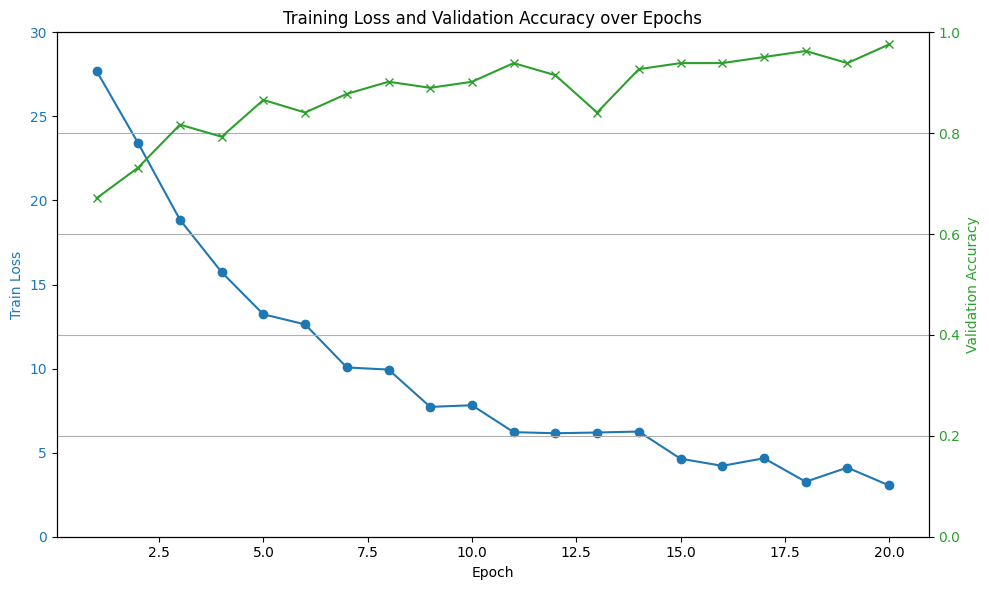

In [1]:
import matplotlib.pyplot as plt

epochs = list(range(1, 21))
train_loss = [27.706, 23.398, 18.853, 15.732, 13.228, 12.630, 10.067, 9.941, 7.723, 7.820,
              6.218, 6.155, 6.198, 6.255, 4.640, 4.216, 4.667, 3.271, 4.111, 3.050]
valid_acc = [0.671, 0.732, 0.817, 0.793, 0.866, 0.841, 0.878, 0.902, 0.890, 0.902,
             0.939, 0.915, 0.841, 0.927, 0.939, 0.939, 0.951, 0.963, 0.939, 0.976]

fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Train Loss', color=color)
ax1.plot(epochs, train_loss, color=color, marker='o', label='Train Loss')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 30)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Validation Accuracy', color=color)
ax2.plot(epochs, valid_acc, color=color, marker='x', label='Validation Accuracy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1)

plt.title('Training Loss and Validation Accuracy over Epochs')
fig.tight_layout()
plt.grid(True)
plt.show()


# Training Summary - Whisper (with original data)

- **Training Loss** consistently decreased from 27.7 to 3.05 over 20 epochs, indicating effective learning.
- **Validation Accuracy** steadily improved from 67.1% to 97.6%, showing strong generalization to unseen data.
- **Final Test Accuracy** achieved 95.3%, confirming that the model generalizes well beyond the training set.
- **No signs of overfitting**: training loss decreased and validation accuracy increased together.
- **Overall**, the model successfully learned meaningful patterns for Parkinson’s speech detection.

In [ ]:
import random
import json
import torch
import numpy as np
import IPython.display as ipd

with open("whisper_test_features.json") as f:
    test_data = json.load(f)

sample = random.choice(test_data)
features = torch.tensor(sample["features"]).float().unsqueeze(0).to(device)
true_label = sample["label"]


model.eval()
with torch.no_grad():
    logits = model(features)
    pred_label = torch.argmax(logits, dim=1).item()

print(f"True Label: {true_label}")
print(f"Predicted Label: {pred_label}")

with open("test.json") as f:
    test_json = json.load(f)
    for uid, entry in test_json.items():
        if entry["label"] == true_label:
            audio_path = entry["wav_path"]
            break

ipd.Audio(audio_path)

✅ True Label: 1
🤖 Predicted Label: 1


In [ ]:
!pip install -q git+https://github.com/openai/whisper.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import whisper
import torch
import torchaudio
import json
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import random
import IPython.display as ipd

model = whisper.load_model("tiny")
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

def extract_features(audio_path):
    audio, sr = torchaudio.load(audio_path)
    if sr != 16000:
        audio = torchaudio.functional.resample(audio, sr, 16000)
    audio = whisper.pad_or_trim(audio.mean(dim=0))
    mel = whisper.log_mel_spectrogram(audio).to(device)
    with torch.no_grad():
        encoded = model.encoder(mel.unsqueeze(0))
    return encoded.squeeze(0).mean(dim=0).cpu().numpy()

def process_json(json_path, output_path):
    with open(json_path) as f:
        data = json.load(f)
    features = []
    for uid, item in tqdm(data.items()):
        feat = extract_features(item["wav_path"])
        features.append({"features": feat.tolist(), "label": item["label"]})
    with open(output_path, "w") as f:
        json.dump(features, f, indent=2)

process_json("train.json", "whisper_tiny_train_features.json")
process_json("valid.json", "whisper_tiny_valid_features.json")
process_json("test.json",  "whisper_tiny_test_features.json")


class WhisperDataset(torch.utils.data.Dataset):
    def __init__(self, json_path):
        with open(json_path) as f:
            data = json.load(f)
        self.features = torch.tensor([x["features"] for x in data], dtype=torch.float32)
        self.labels = torch.tensor([x["label"] for x in data], dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_loader = DataLoader(WhisperDataset("whisper_tiny_train_features.json"), batch_size=8, shuffle=True)
valid_loader = DataLoader(WhisperDataset("whisper_tiny_valid_features.json"), batch_size=8)
test_loader  = DataLoader(WhisperDataset("whisper_tiny_test_features.json"), batch_size=8)

class Classifier(nn.Module):
    def __init__(self, input_dim=384, hidden_dim=256, num_classes=2):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, x):
        return self.fc(x)

model_cls = Classifier().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cls.parameters(), lr=1e-3)

def evaluate(loader):
    model_cls.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            pred = model_cls(x).argmax(dim=1)
            all_preds.extend(pred.cpu().numpy())
            all_labels.extend(y.cpu().numpy())
    return accuracy_score(all_labels, all_preds)

best_acc = 0
for epoch in range(1, 21):
    model_cls.train()
    total_loss = 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        out = model_cls(x)
        loss = loss_fn(out, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    acc = evaluate(valid_loader)
    print(f"Epoch {epoch} | Loss: {total_loss:.3f} | Valid Acc: {acc:.3f}")
    if acc > best_acc:
        best_acc = acc
        torch.save(model_cls.state_dict(), "best_whisper.pt")

model_cls.load_state_dict(torch.load("best_whisper.pt"))
test_acc = evaluate(test_loader)
print(f"Final Test Accuracy: {test_acc:.3f}")


100%|█████████████████████████████████████| 72.1M/72.1M [00:01<00:00, 59.0MiB/s]
100%|██████████| 85/85 [00:03<00:00, 25.82it/s]


Epoch 1 | Loss: 53.129 | Valid Acc: 0.659
Epoch 2 | Loss: 40.836 | Valid Acc: 0.866
Epoch 3 | Loss: 32.532 | Valid Acc: 0.817
Epoch 4 | Loss: 33.934 | Valid Acc: 0.890
Epoch 5 | Loss: 22.426 | Valid Acc: 0.878
Epoch 6 | Loss: 20.487 | Valid Acc: 0.939
Epoch 7 | Loss: 20.229 | Valid Acc: 0.902
Epoch 8 | Loss: 16.736 | Valid Acc: 0.915
Epoch 9 | Loss: 13.980 | Valid Acc: 0.939
Epoch 10 | Loss: 13.189 | Valid Acc: 0.939
Epoch 11 | Loss: 11.089 | Valid Acc: 0.939
Epoch 12 | Loss: 10.899 | Valid Acc: 0.927
Epoch 13 | Loss: 10.882 | Valid Acc: 0.915
Epoch 14 | Loss: 12.670 | Valid Acc: 0.939
Epoch 15 | Loss: 9.897 | Valid Acc: 0.939
Epoch 16 | Loss: 9.430 | Valid Acc: 0.939
Epoch 17 | Loss: 9.126 | Valid Acc: 0.951
Epoch 18 | Loss: 10.065 | Valid Acc: 0.951
Epoch 19 | Loss: 8.222 | Valid Acc: 0.963
Epoch 20 | Loss: 7.083 | Valid Acc: 0.963
✅ Final Test Accuracy: 0.953


In [ ]:
import random
import json
import torch
import IPython.display as ipd

with open("whisper_tiny_test_features.json") as f1, open("test.json") as f2:
    features_json = json.load(f1)
    audio_json = json.load(f2)

sample = random.choice(features_json)
feature_tensor = torch.tensor(sample["features"]).unsqueeze(0).to(device)
true_label = sample["label"]

model_cls.eval()
with torch.no_grad():
    pred_label = model_cls(feature_tensor).argmax(dim=1).item()

print(f"True Label: {true_label}")
print(f"Predicted Label: {pred_label}")

for uid, entry in audio_json.items():
    if entry["label"] == true_label:
        print(f"Playing: {entry['wav_path']}")
        ipd.display(ipd.Audio(entry["wav_path"]))
        break

✅ True Label: 1
🤖 Predicted Label: 1
🔊 Playing: /root/.cache/huggingface/hub/datasets--birgermoell--Italian_Parkinsons_Voice_and_Speech/snapshots/26008aa5918bf294bb3bd3fd4095ba69f01d4178/italian_parkinson/28 People with Parkinson's disease/17-28/Giovanni M/VI2GMIAOSVI44M100220170948.wav


## Parkinson’s Detection with Whisper Embeddings (with augmented data)

This notebook performs **Parkinson’s disease classification** from audio using **Whisper encoder features** and a custom neural network. Here's a breakdown of the full pipeline:

---

### 1. Feature Extraction using Whisper

We load the pretrained `whisper-base` model and pass each audio file through it to get **dense 512-dimensional embeddings** from the encoder. These embeddings are computed by:
- Converting each audio to mono & resampling to 16kHz.
- Computing the **log-Mel spectrogram**.
- Passing it to `model.encoder(...)`.
- Applying **mean pooling** across time to get a single 512-d vector per sample.


In [ ]:
import whisper
import torchaudio
import json
import torch
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
model = whisper.load_model("base").to(device)

def extract_whisper_features(wav_path):
    audio, sr = torchaudio.load(wav_path)

    if sr != 16000:
        audio = torchaudio.functional.resample(audio, sr, 16000)

    audio = whisper.pad_or_trim(audio.mean(dim=0))


    mel = whisper.log_mel_spectrogram(audio).to(device)

    with torch.no_grad():
        features = model.encoder(mel.unsqueeze(0))

    return features.squeeze(0).mean(dim=0).cpu().numpy()

def process_json(json_path, out_path):
    with open(json_path) as f:
        data = json.load(f)

    entries = []
    for uid, entry in tqdm(data.items()):
        path = entry["wav_path"]
        label = entry["label"]
        feats = extract_whisper_features(path)
        entries.append({
            "features": feats.tolist(),
            "label": label
        })

    with open(out_path, "w") as f:
        json.dump(entries, f, indent=2)

process_json("new_train.json", "whisper_aug_train_features.json")
process_json("new_valid.json", "whisper_aug_valid_features.json")
process_json("new_test.json",  "whisper_aug_test_features.json")

100%|██████████| 85/85 [00:03<00:00, 25.78it/s]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import json
import numpy as np
from sklearn.metrics import accuracy_score

class WhisperFeatureDataset(Dataset):
    def __init__(self, json_path):
        with open(json_path) as f:
            data = json.load(f)
        self.features = torch.tensor([x["features"] for x in data], dtype=torch.float32)
        self.labels = torch.tensor([x["label"] for x in data], dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = WhisperFeatureDataset("whisper_aug_train_features.json")
valid_dataset = WhisperFeatureDataset("whisper_aug_valid_features.json")
test_dataset  = WhisperFeatureDataset("whisper_aug_test_features.json")

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=16)
test_loader  = DataLoader(test_dataset,  batch_size=16)

class WhisperClassifier(nn.Module):
    def __init__(self, input_dim=512, hidden_dim=256, num_classes=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, x):
        return self.net(x)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = WhisperClassifier().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

def evaluate(loader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            preds = model(x).argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y.cpu().numpy())
    return accuracy_score(all_labels, all_preds)

best_valid_acc = 0
for epoch in range(1, 21):
    model.train()
    total_loss = 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        logits = model(x)
        loss = loss_fn(logits, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    valid_acc = evaluate(valid_loader)
    print(f"Epoch {epoch} | Train Loss: {total_loss:.3f} | Valid Acc: {valid_acc:.3f}")

    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(model.state_dict(), "best_whisper_classifier.pt")

model.load_state_dict(torch.load("best_whisper_classifier.pt"))
test_acc = evaluate(test_loader)
print(f"Test Accuracy: {test_acc:.3f}")

Epoch 1 | Train Loss: 29.633 | Valid Acc: 0.476
Epoch 2 | Train Loss: 28.873 | Valid Acc: 0.610
Epoch 3 | Train Loss: 26.887 | Valid Acc: 0.634
Epoch 4 | Train Loss: 26.811 | Valid Acc: 0.598
Epoch 5 | Train Loss: 25.789 | Valid Acc: 0.598
Epoch 6 | Train Loss: 25.106 | Valid Acc: 0.585
Epoch 7 | Train Loss: 24.791 | Valid Acc: 0.634
Epoch 8 | Train Loss: 25.028 | Valid Acc: 0.634
Epoch 9 | Train Loss: 25.226 | Valid Acc: 0.622
Epoch 10 | Train Loss: 24.108 | Valid Acc: 0.622
Epoch 11 | Train Loss: 24.758 | Valid Acc: 0.573
Epoch 12 | Train Loss: 23.745 | Valid Acc: 0.622
Epoch 13 | Train Loss: 23.263 | Valid Acc: 0.646
Epoch 14 | Train Loss: 23.093 | Valid Acc: 0.695
Epoch 15 | Train Loss: 22.641 | Valid Acc: 0.683
Epoch 16 | Train Loss: 22.631 | Valid Acc: 0.671
Epoch 17 | Train Loss: 23.030 | Valid Acc: 0.720
Epoch 18 | Train Loss: 21.522 | Valid Acc: 0.707
Epoch 19 | Train Loss: 21.746 | Valid Acc: 0.707
Epoch 20 | Train Loss: 22.651 | Valid Acc: 0.671
✅ Test Accuracy: 0.706


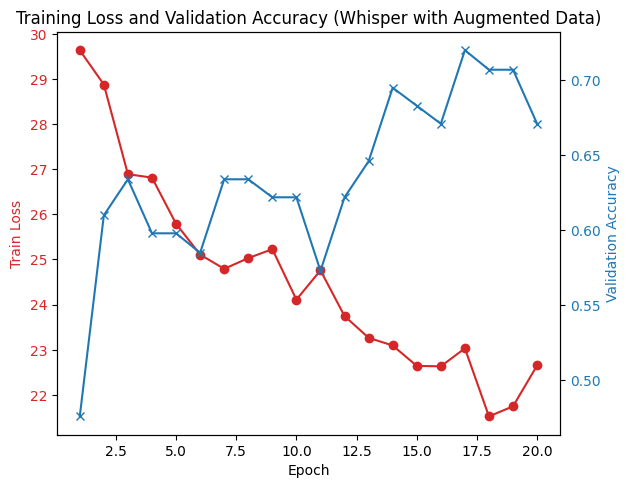

In [3]:
import matplotlib.pyplot as plt

epochs = list(range(1, 21))
train_loss = [
    29.633, 28.873, 26.887, 26.811, 25.789,
    25.106, 24.791, 25.028, 25.226, 24.108,
    24.758, 23.745, 23.263, 23.093, 22.641,
    22.631, 23.030, 21.522, 21.746, 22.651
]
valid_acc = [
    0.476, 0.610, 0.634, 0.598, 0.598,
    0.585, 0.634, 0.634, 0.622, 0.622,
    0.573, 0.622, 0.646, 0.695, 0.683,
    0.671, 0.720, 0.707, 0.707, 0.671
]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Train Loss', color=color)
ax1.plot(epochs, train_loss, marker='o', color=color, label='Train Loss')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Validation Accuracy', color=color)
ax2.plot(epochs, valid_acc, marker='x', color=color, label='Validation Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Training Loss and Validation Accuracy (Whisper with Augmented Data)')
plt.show()

# Training Summary - Whisper (with augmented data)

- Training Loss decreased overall from 29.6 to 22.6, but the decrease was slower and less stable compared to the original data.
- Validation Accuracy fluctuated significantly between 47.6% and 72.0%, showing instability in learning.
- Final Test Accuracy was 70.6%, which is considerably lower than the model trained on the original data.
- The fluctuations suggest the model struggled to generalize well with augmented data, possibly due to noisy or overly challenging augmentations.
- Overall, the model learned some patterns but was less robust than on clean original data.